In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from numpy import sqrt
from numpy import log
from numpy import cbrt
from numpy import exp
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("OilPricedataset.csv")
data

,Date,Value
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8291,30-10-2018,66.18
8292,31-10-2018,65.31
8293,01-11-2018,63.67
8294,02-11-2018,63.12


In [4]:
data.head(10)

,Date,Value
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
5,09-01-1986,26.03
6,10-01-1986,25.65
7,13-01-1986,25.08
8,14-01-1986,24.97
9,15-01-1986,25.18


In [5]:
data.tail(10)

,Date,Value
8286,23-10-2018,66.49
8287,24-10-2018,66.56
8288,25-10-2018,67.25
8289,26-10-2018,67.58
8290,29-10-2018,67.00
8291,30-10-2018,66.18
8292,31-10-2018,65.31
8293,01-11-2018,63.67
8294,02-11-2018,63.12
8295,05-11-2018,63.12


In [6]:
data.dtypes

Date      object
Value    float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8296 entries, 0 to 8295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8296 non-null   object 
 1   Value   8296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 129.8+ KB


In [8]:
### EDA

In [9]:
data.rename(columns={"Value":"Price"},inplace=True)
data

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8291,30-10-2018,66.18
8292,31-10-2018,65.31
8293,01-11-2018,63.67
8294,02-11-2018,63.12


In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,Price
count,8296.000000
mean,43.743510
std,29.590697
min,10.250000
25%,19.600000
50%,29.945000
75%,64.590000
max,145.310000


In [12]:
data.isna().sum()

Date     0
Price    0
dtype: int64

In [13]:
data.mean()

Price    43.74351
dtype: float64

In [14]:
data.var()

Price    875.609372
dtype: float64

In [15]:
data.kurt()

Price   -0.35605
dtype: float64

In [16]:
data.skew()

Price    0.908863
dtype: float64

In [17]:
data.isnull().any()

Date     False
Price    False
dtype: bool

In [18]:
data[data.isnull().any(axis=1)]

,Date,Price


In [19]:
mean=data['Price'].mean()
print(mean)

43.74351012536162


In [20]:
### Imputation technique for null values

In [21]:
data['Price']=data['Price'].fillna(mean)
data

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8291,30-10-2018,66.18
8292,31-10-2018,65.31
8293,01-11-2018,63.67
8294,02-11-2018,63.12


In [22]:
data1=data.copy()
data1

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8291,30-10-2018,66.18
8292,31-10-2018,65.31
8293,01-11-2018,63.67
8294,02-11-2018,63.12


In [23]:
data1['Date']=pd.to_datetime(data1.Date)
data1

,Date,Price
0,1986-02-01,25.56
1,1986-03-01,26.00
2,1986-06-01,26.53
3,1986-07-01,25.85
4,1986-08-01,25.87
...,...,...
8291,2018-10-30,66.18
8292,2018-10-31,65.31
8293,2018-01-11,63.67
8294,2018-02-11,63.12


In [24]:
data1.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [25]:
data1['Year'] = data1['Date'].dt.year
data1

,Date,Price,Year
0,1986-02-01,25.56,1986
1,1986-03-01,26.00,1986
2,1986-06-01,26.53,1986
3,1986-07-01,25.85,1986
4,1986-08-01,25.87,1986
...,...,...,...
8291,2018-10-30,66.18,2018
8292,2018-10-31,65.31,2018
8293,2018-01-11,63.67,2018
8294,2018-02-11,63.12,2018


In [26]:
### Correlation

In [27]:
data1.corr()

,Price,Year
Price,1.00000,0.75621
Year,0.75621,1.00000


In [28]:
data.set_index('Date',inplace=True)
data

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


In [29]:
### Outlier detection

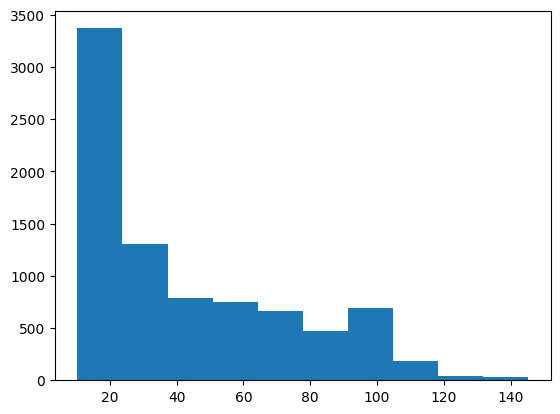

In [30]:
plt.hist(data['Price'])
plt.show()

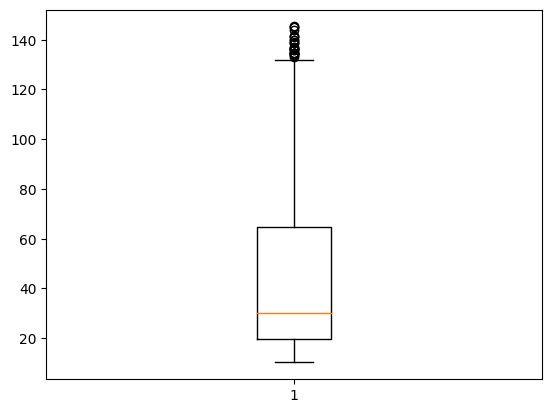

In [31]:
plt.boxplot(data['Price'])
plt.show()

In [32]:
data.describe()

,Price
count,8296.000000
mean,43.743510
std,29.590697
min,10.250000
25%,19.600000
50%,29.945000
75%,64.590000
max,145.310000


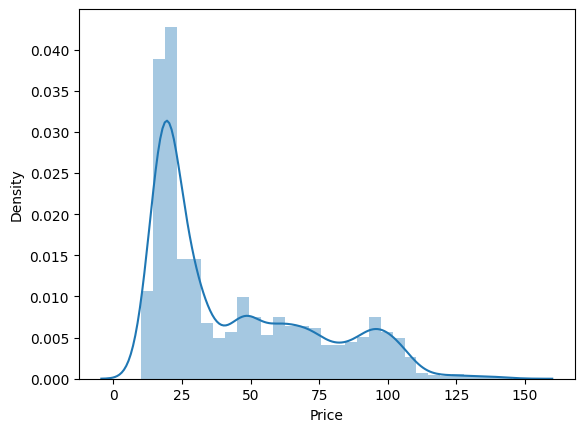

In [33]:
sns.distplot(data['Price'])
plt.show()

In [34]:
Q1 = np.percentile(data,25,interpolation= 'midpoint')
Q1

19.6

In [35]:
Q3 = np.percentile(data,75,interpolation= 'midpoint')
Q3

64.59

In [36]:
IQR = Q3 - Q1
IQR

44.99

In [37]:
Q3+1.5*IQR #Upper extreme

132.075

In [38]:
Q1-1.5*IQR #Lower extreme

-47.885

In [39]:
upper = np.where(data > (Q3+1.5*IQR))
upper

(array([5648, 5659, 5660, 5662, 5663, 5664, 5665, 5666, 5667, 5669, 5670,
        5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681,
        5682, 5683, 5684, 5685, 5686]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]))

In [40]:
lower = np.where(data < (Q1-1.5*IQR))
lower

(array([], dtype=int64), array([], dtype=int64))

In [41]:
### Removing outliers

In [42]:
data2=data.drop(data.index[[5648, 5659, 5660, 5662, 5663, 5664, 5665, 5666, 5667, 5669, 5670,
        5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681,
        5682, 5683, 5684, 5685, 5686]],axis=0)
data2

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


In [43]:
data2.describe()

,Price
count,8269.000000
mean,43.435594
std,29.142573
min,10.250000
25%,19.600000
50%,29.810000
75%,63.960000
max,131.880000


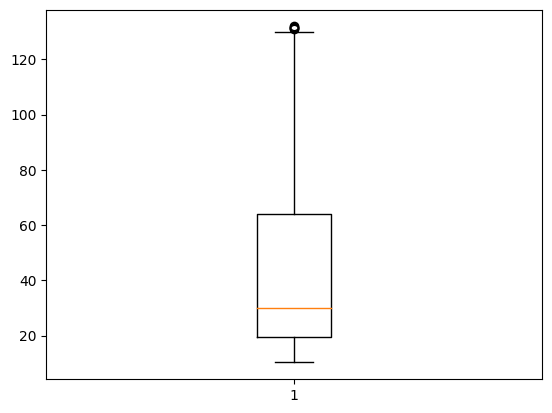

In [44]:
plt.boxplot(data2['Price'])
plt.show()

In [45]:
print(np.where(data2>=136.91))

(array([], dtype=int64), array([], dtype=int64))


In [46]:
### Using Z score Method

In [47]:
from scipy.stats import zscore
z_scores = zscore(data2['Price'])

In [48]:
threshold = 3

In [49]:
outliers = (abs(z_scores) > threshold)
outliers

Date
02-01-1986    False
03-01-1986    False
06-01-1986    False
07-01-1986    False
08-01-1986    False
              ...  
30-10-2018    False
31-10-2018    False
01-11-2018    False
02-11-2018    False
05-11-2018    False
Name: Price, Length: 8269, dtype: bool

In [50]:
data3 = data2[~outliers]
data3

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


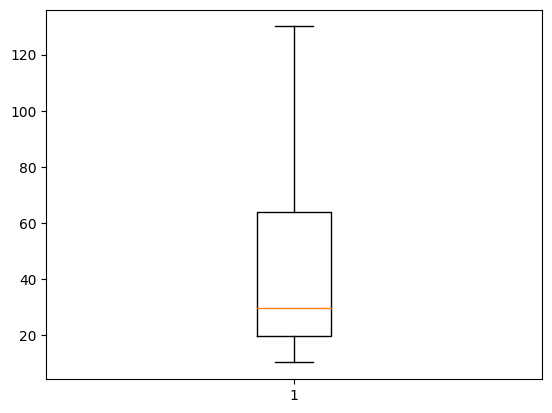

In [51]:
plt.boxplot(data3['Price'])
plt.show()

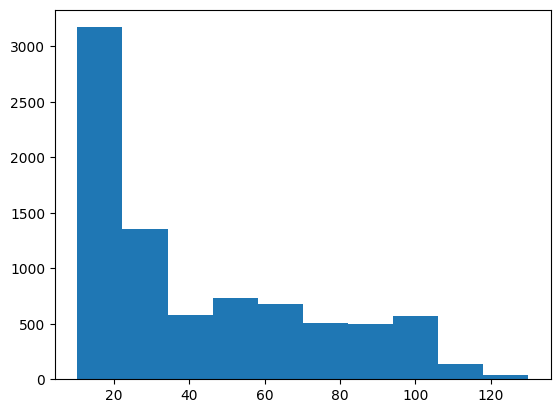

In [52]:
plt.hist(data3['Price'])
plt.show()

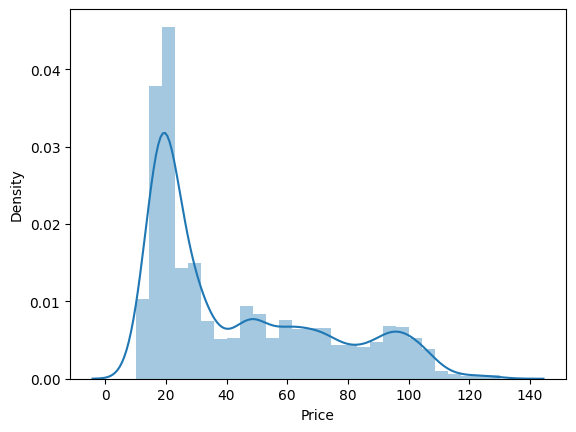

In [53]:
sns.distplot(data3['Price'])
plt.show()

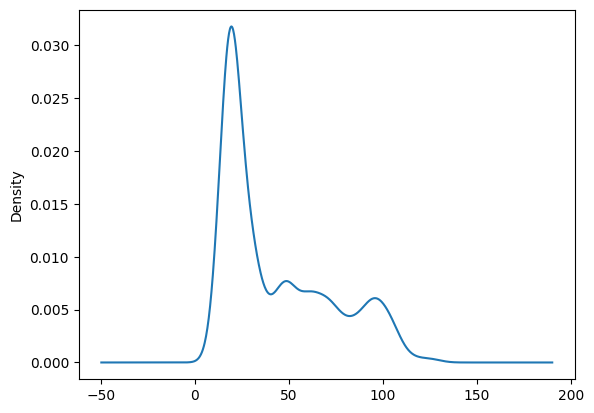

In [54]:
data3['Price'].plot(kind='kde')
plt.show()

In [55]:
data4=data3.reset_index()
data4

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [56]:
data4['Date']=pd.to_datetime(data4.Date)
data4

,Date,Price
0,1986-02-01,25.56
1,1986-03-01,26.00
2,1986-06-01,26.53
3,1986-07-01,25.85
4,1986-08-01,25.87
...,...,...
8259,2018-10-30,66.18
8260,2018-10-31,65.31
8261,2018-01-11,63.67
8262,2018-02-11,63.12


In [57]:
data4["Date"] = pd.to_datetime(data4.Date,format="%b-%y")
data4["Month"] = data4.Date.dt.strftime("%b") # month extraction
data4["Year"] = data4.Date.dt.strftime("%Y") # year extraction
data4

,Date,Price,Month,Year
0,1986-02-01,25.56,Feb,1986
1,1986-03-01,26.00,Mar,1986
2,1986-06-01,26.53,Jun,1986
3,1986-07-01,25.85,Jul,1986
4,1986-08-01,25.87,Aug,1986
...,...,...,...,...
8259,2018-10-30,66.18,Oct,2018
8260,2018-10-31,65.31,Oct,2018
8261,2018-01-11,63.67,Jan,2018
8262,2018-02-11,63.12,Feb,2018


In [58]:
### Heatmap

<Axes: xlabel='Month', ylabel='Year'>

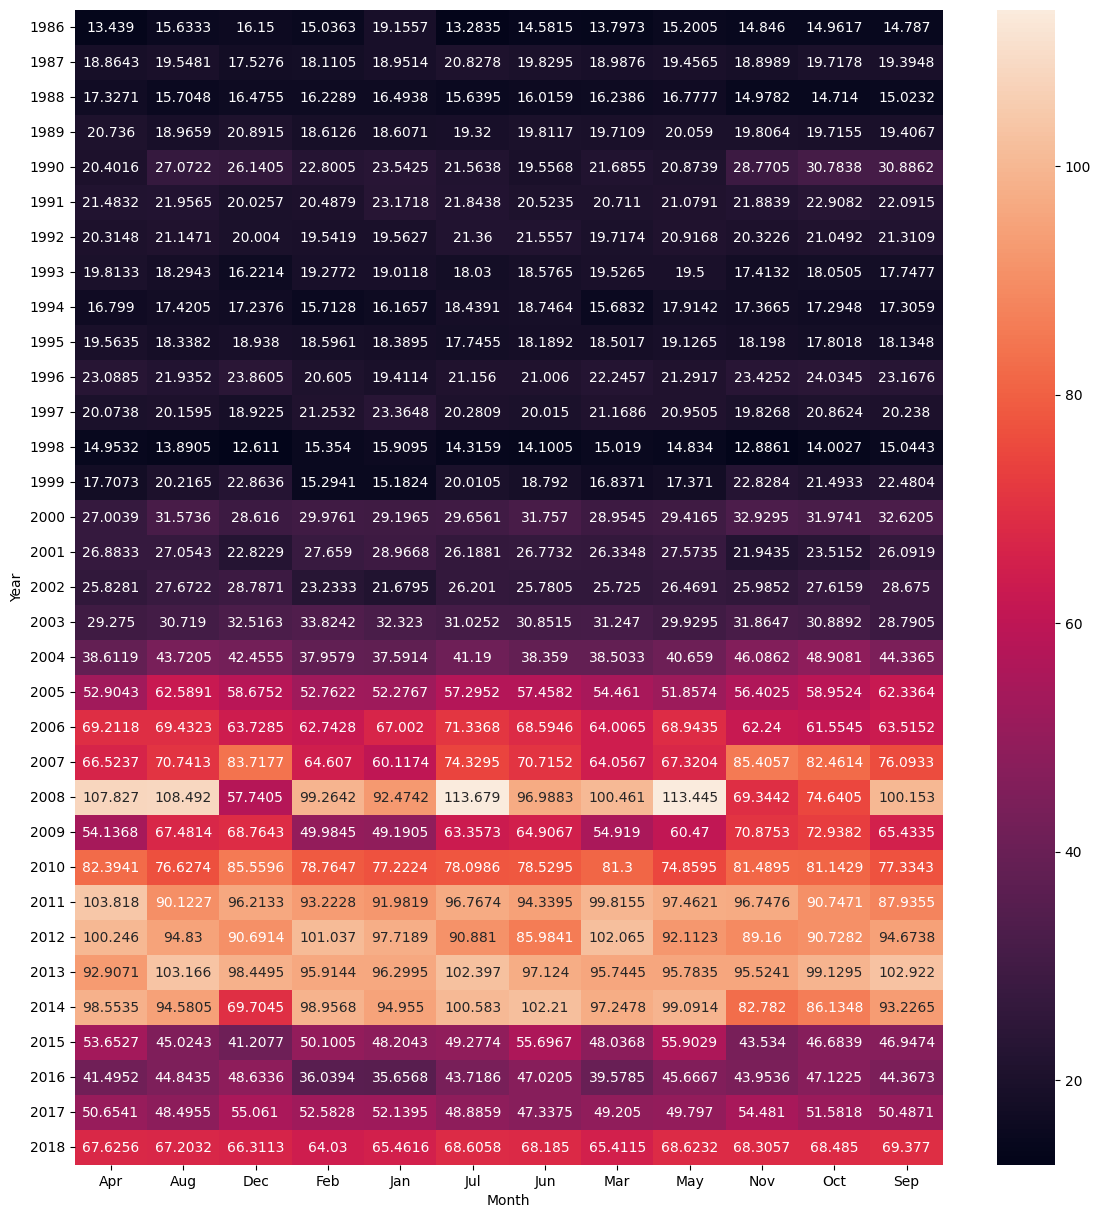

In [59]:
plt.figure(figsize=(14,15))
heatmap = pd.pivot_table(data=data4,values="Price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

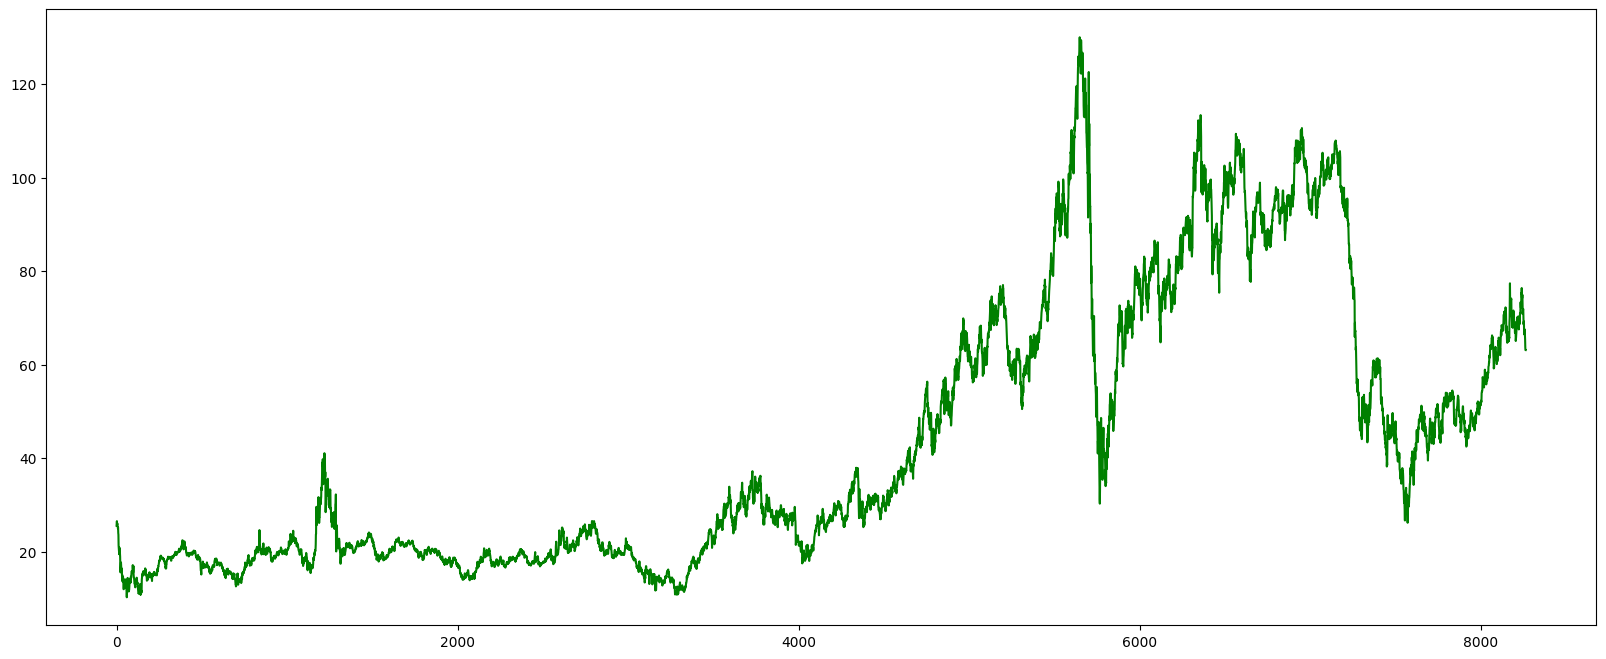

In [60]:
data4['Price'].plot(figsize=(20, 8),color='green')
plt.show()

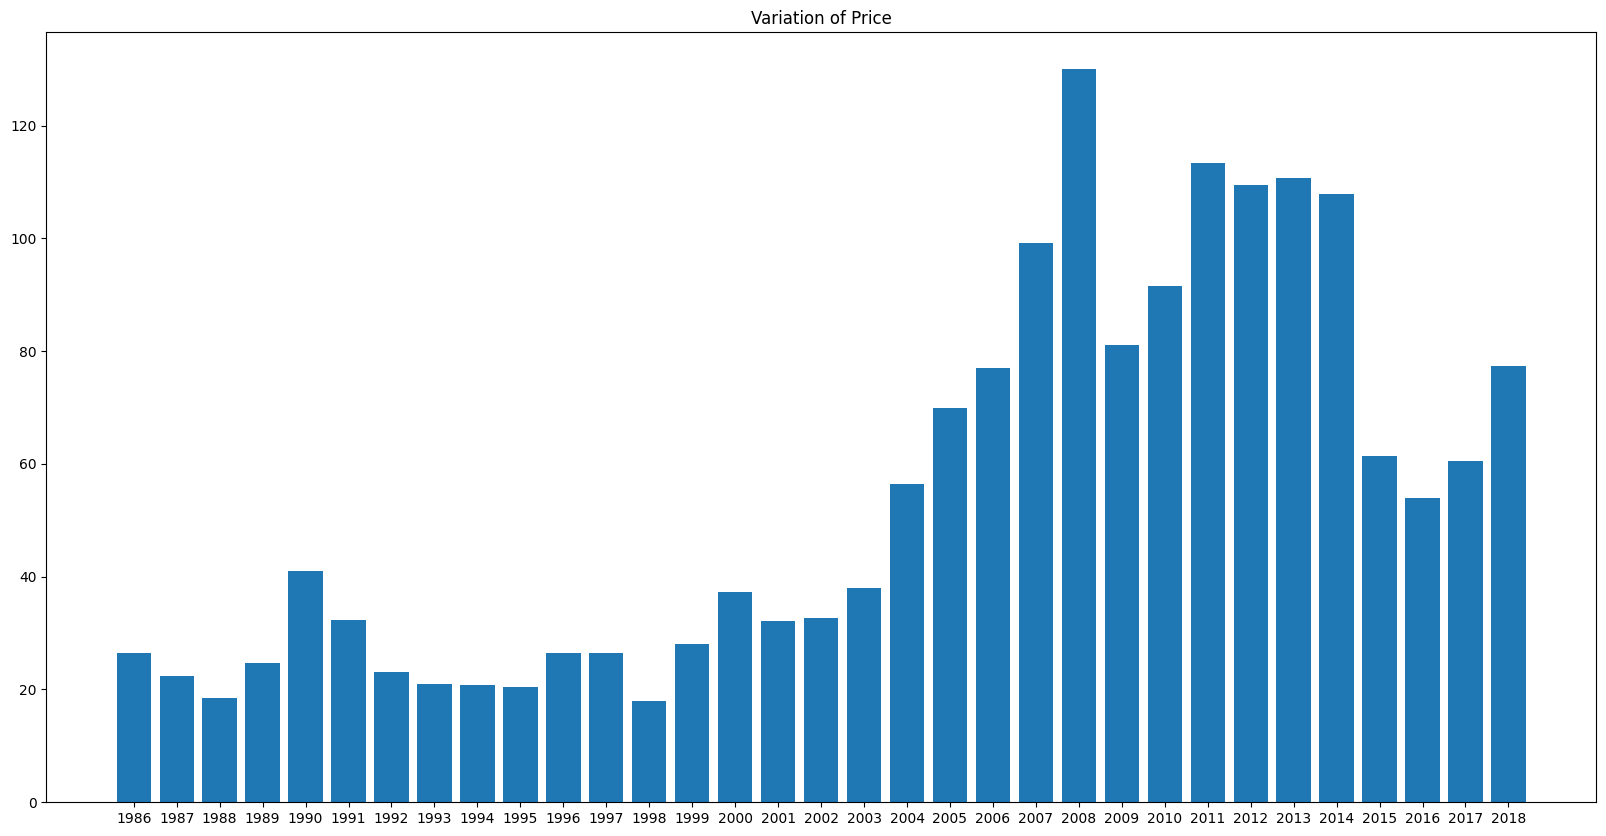

In [61]:
plt.figure(figsize=(20,10))
x=data4['Year']
y=data4['Price']
plt.bar(x,y)
plt.title('Variation of Price')
plt.show()

<Axes: xlabel='Year', ylabel='Price'>

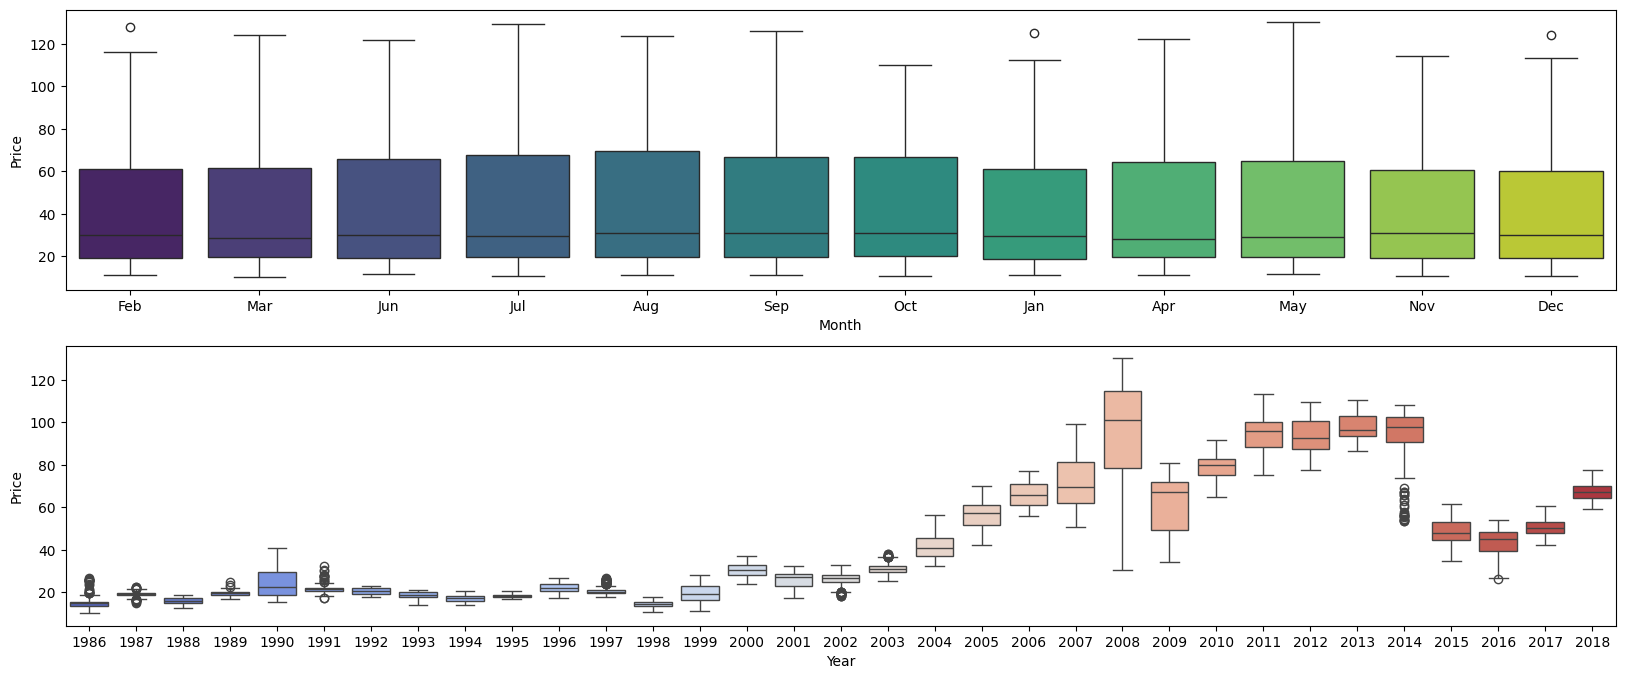

In [62]:
plt.figure(figsize= (20,8))
plt.subplot(211)
sns.boxplot(x="Month", y="Price", data= data4,palette='viridis')
plt.subplot(212)
sns.boxplot(x="Year", y= "Price", data=data4,palette='coolwarm')

In [63]:
### Time Series Decomposition

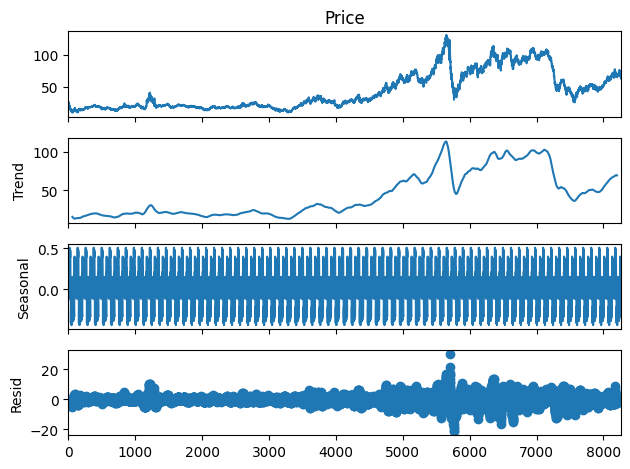

In [64]:
decomposition_ts_add = sm.tsa.seasonal_decompose(data4['Price'], model='additive',period=120)
fig = decomposition_ts_add.plot()
plt.show()

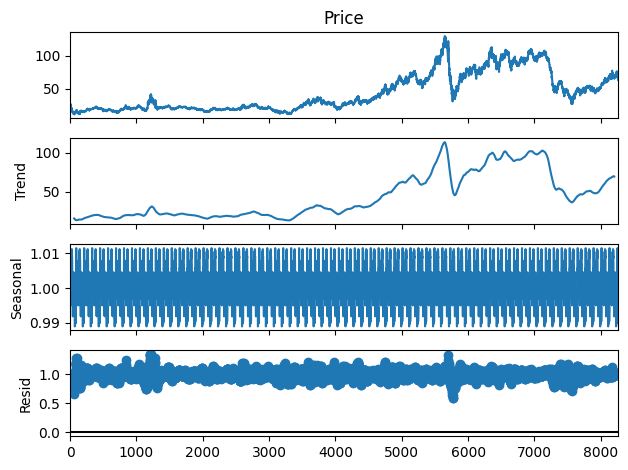

In [65]:
decomposition_ts_mult = sm.tsa.seasonal_decompose(data4['Price'], model='multiplicative',period=120)
fig = decomposition_ts_mult.plot()
plt.show()

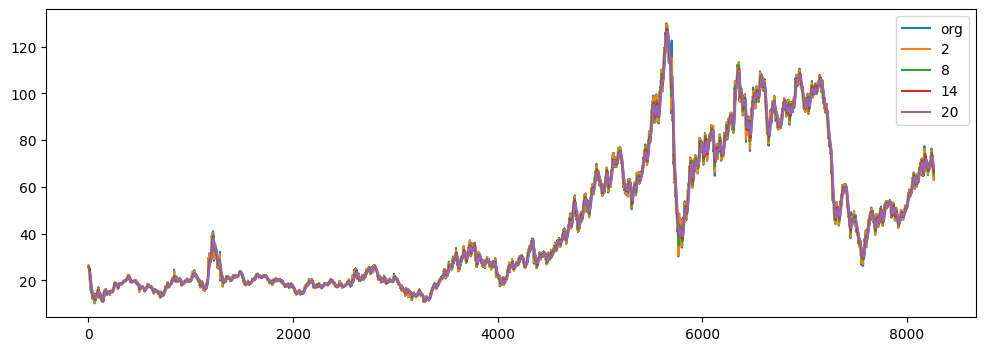

In [66]:
plt.figure(figsize=(12,4))
data4.Price.plot(label="org")
for i in range (2,24,6):
    data4["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

In [67]:
data3

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


In [68]:
### Adfuller test (To check for the stationarity of our data)

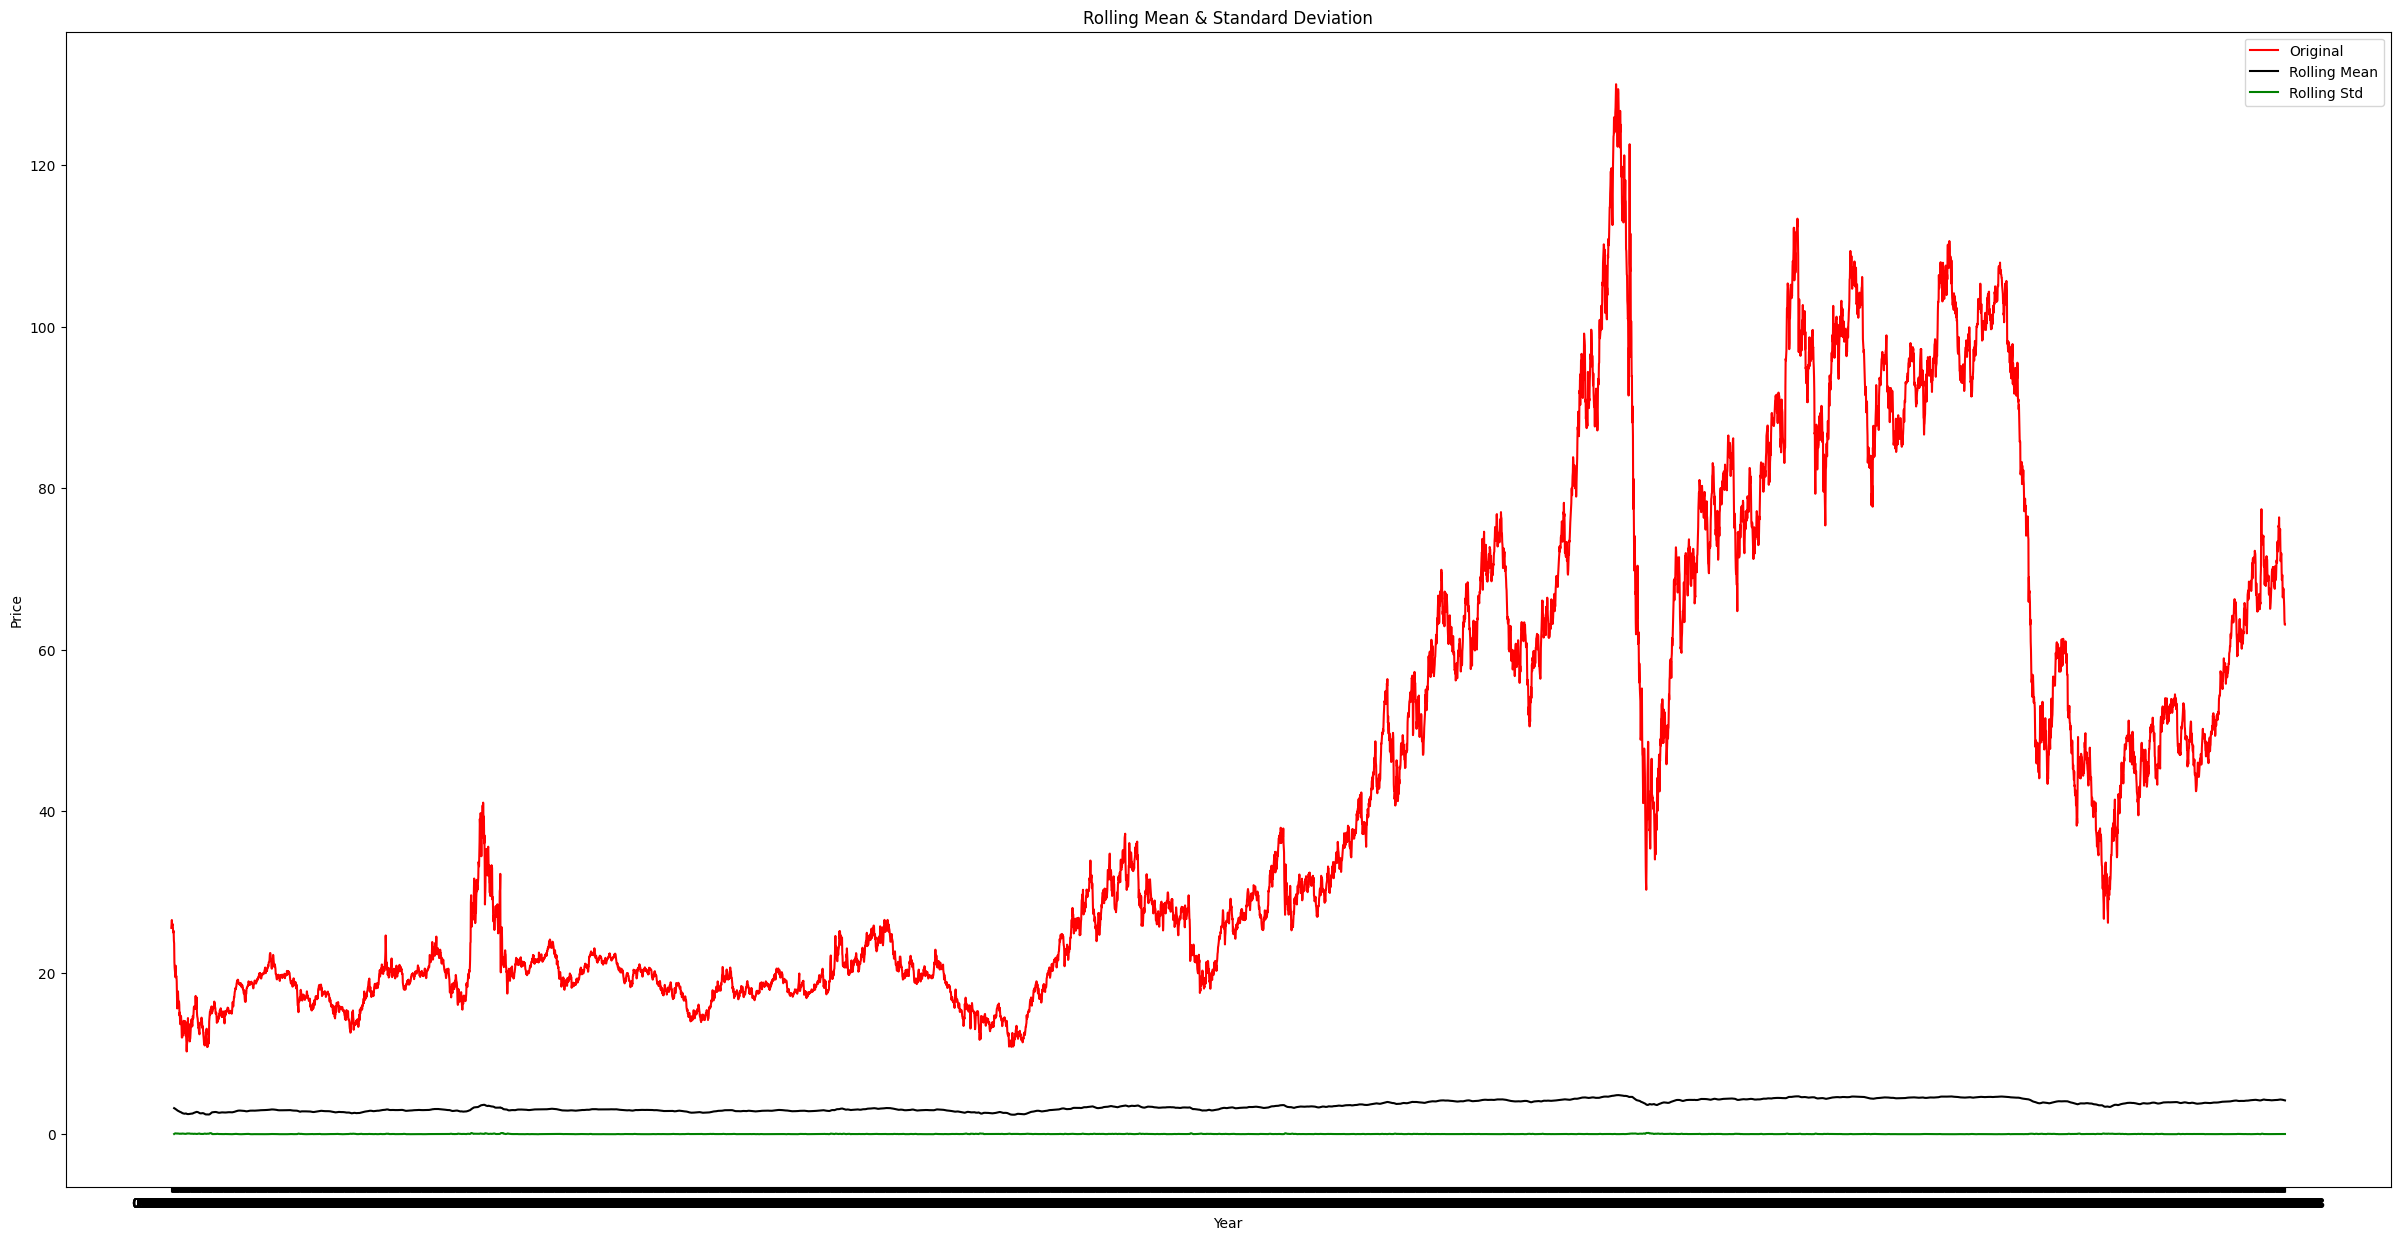

Test statistic: -2.0283410684119154
p-value: 0.2742864171737848
Critical Values: {'1%': -3.4311452032308343, '5%': -2.8618914241795745, '10%': -2.56695705828814}


In [69]:
def check_adfuller(data3):
    result = adfuller(data3,autolag='AIC')
    print('Test statistic:',result[0])
    print('p-value:',result[1])
    print('Critical Values:',result[4])
def check_mean_std(data3):
    data3_log = np.log(data3)
    moving_avg = data3_log.rolling(12).mean()
    moving_std = data3_log.rolling(12).std()
    plt.figure(figsize=(30,15))
    orig = plt.plot(data3,color = 'red',label = 'Original')
    mean = plt.plot(moving_avg, color = 'black',label= 'Rolling Mean')
    std = plt.plot(moving_std,color = 'green',label= 'Rolling Std')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
check_mean_std(data3)
check_adfuller(data3.Price)

In [70]:
### Applying tranformations to convert non-stationary data to stationary data

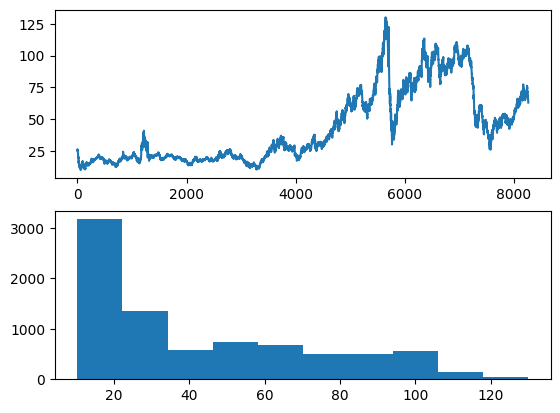

In [71]:
# Linear transform
dataframe_linear = DataFrame(data3.values)
dataframe_linear.columns = ['Price']
# line plot
plt.subplot(211)
plt.plot(dataframe_linear['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_linear['Price'])
plt.show()

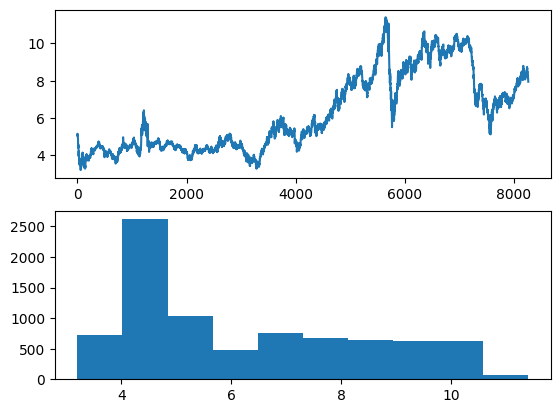

In [72]:
# Square root transform
dataframe_sqrt = DataFrame(data3.values)
dataframe_sqrt.columns = ['Price']
dataframe_sqrt['Price'] = sqrt (dataframe_sqrt['Price'])
# line plot
plt.subplot(211)
plt.plot(dataframe_sqrt['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_sqrt['Price'])
plt.show()

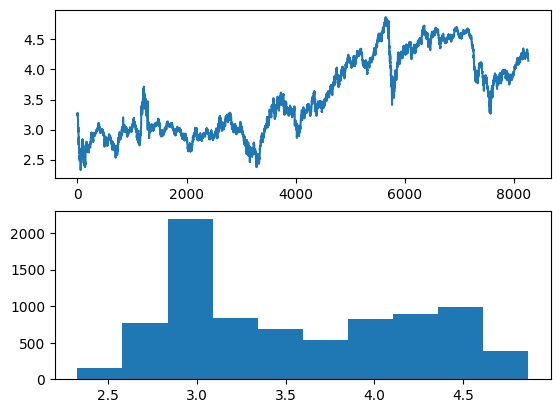

In [73]:
# Log transform
dataframe_log = DataFrame(data3.values)
dataframe_log.columns = ['Price']
dataframe_log['Price'] = log(dataframe_log['Price'])
# line plot
plt.subplot(211)
plt.plot(dataframe_log['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_log['Price'])
plt.show()

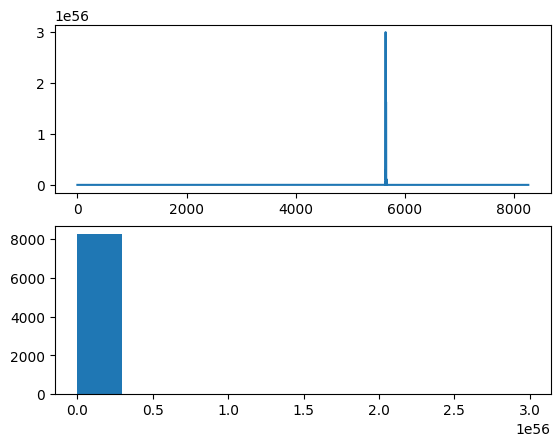

In [74]:
#Exponential transform
dataframe_exp = DataFrame(data3.values)
dataframe_exp.columns = ['Price']
dataframe_exp['Price'] = exp(dataframe_exp['Price'])
# line plot
plt.subplot(211)
plt.plot(dataframe_exp['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_exp['Price'])
plt.show()

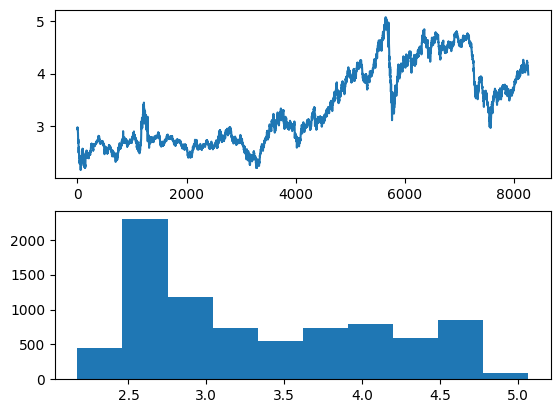

In [75]:
# Cube root transform
dataframe_cbrt = DataFrame(data3.values)
dataframe_cbrt.columns = ['Price']
dataframe_cbrt['Price'] = cbrt(dataframe_cbrt['Price'])
# line plot
plt.subplot(211)
plt.plot(dataframe_cbrt['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_cbrt['Price'])
plt.show()

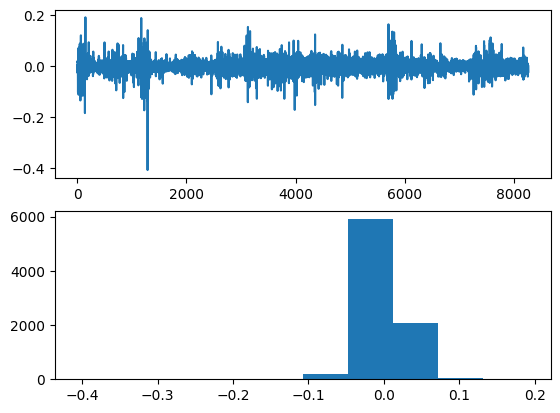

In [76]:
# Log differencing transform
dataframe_log_diff = DataFrame(data3.values)
dataframe_log_diff.columns = ['Price']
dataframe_log_diff['Price'] = log(dataframe_log_diff['Price']) - log(dataframe_log_diff['Price']).shift(1)
# line plot
plt.subplot(211)
plt.plot(dataframe_log_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_log_diff['Price'])
plt.show()

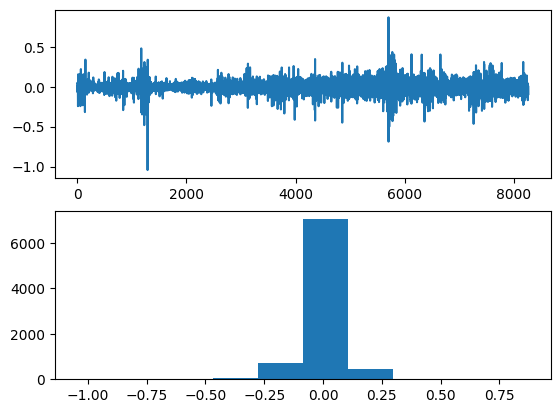

In [77]:
# Square root differencing transform
dataframe_sqrt_diff = DataFrame(data3.values)
dataframe_sqrt_diff.columns = ['Price']
dataframe_sqrt_diff['Price'] = sqrt(dataframe_sqrt_diff['Price']) - sqrt(dataframe_sqrt_diff['Price']).shift(1)
# line plot
plt.subplot(211)
plt.plot(dataframe_sqrt_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_sqrt_diff['Price'])
plt.show()

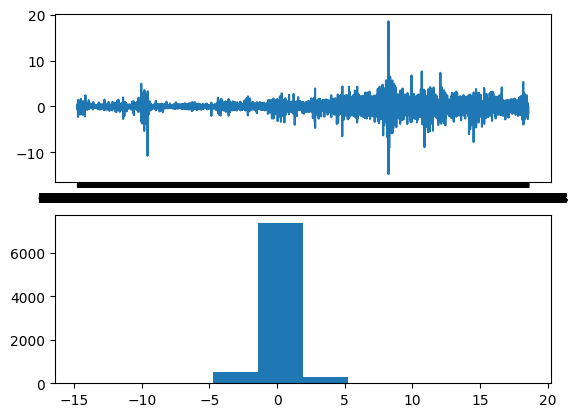

In [78]:
# First order differencing
dataframe_first_diff = data3.diff()[1:]
dataframe_first_diff
# line plot
plt.subplot(211)
plt.plot(dataframe_first_diff['Price'])
# histogram
plt.subplot(212)
plt.hist(dataframe_first_diff['Price'])
plt.show()

In [79]:
dataframe_first_diff

,Price
Date,
03-01-1986,0.44
06-01-1986,0.53
07-01-1986,-0.68
08-01-1986,0.02
09-01-1986,0.16
...,...
30-10-2018,-0.82
31-10-2018,-0.87
01-11-2018,-1.64


In [80]:
### ACF and PACF plots

In [81]:
### ACF and PACF plots before applying transformations

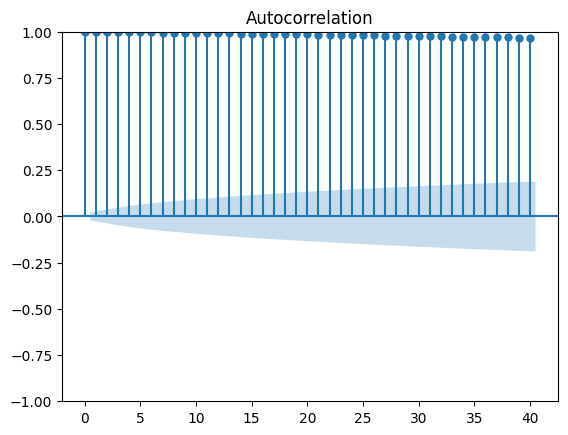

In [82]:
plot_acf(data3['Price'])
plt.show()

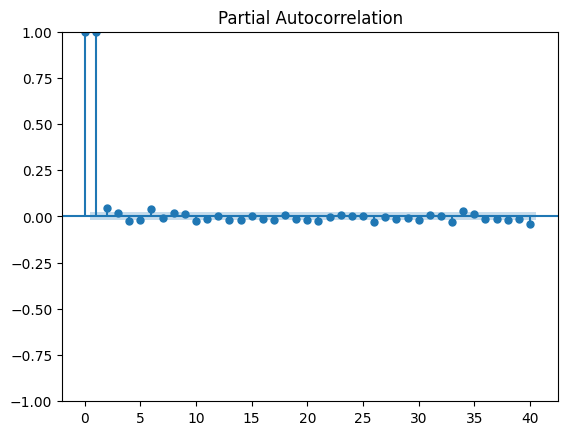

In [83]:
plot_pacf(data3['Price'])
plt.show()

In [84]:
### ACF and PACF plots after applying transformations

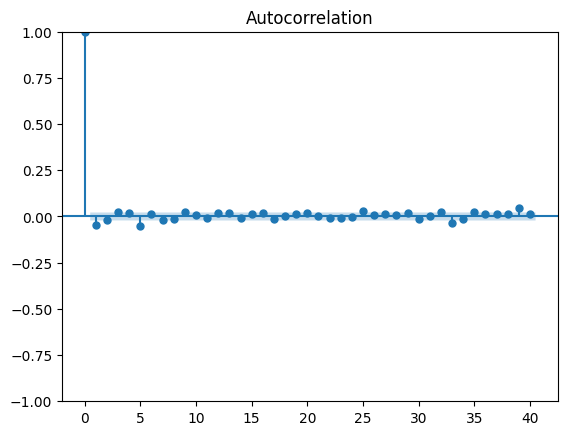

In [85]:
plot_acf(dataframe_first_diff['Price'])
plt.show()

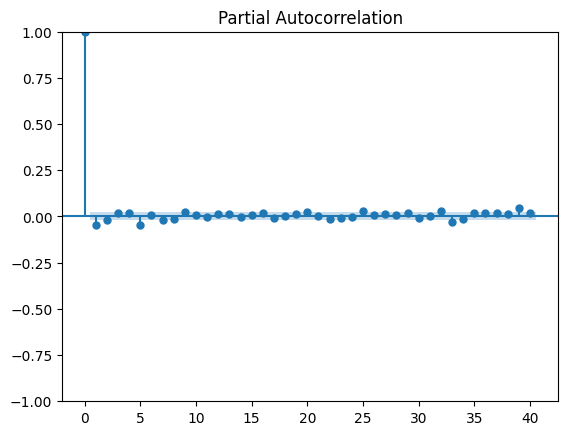

In [86]:
plot_pacf(dataframe_first_diff['Price'])
plt.show()

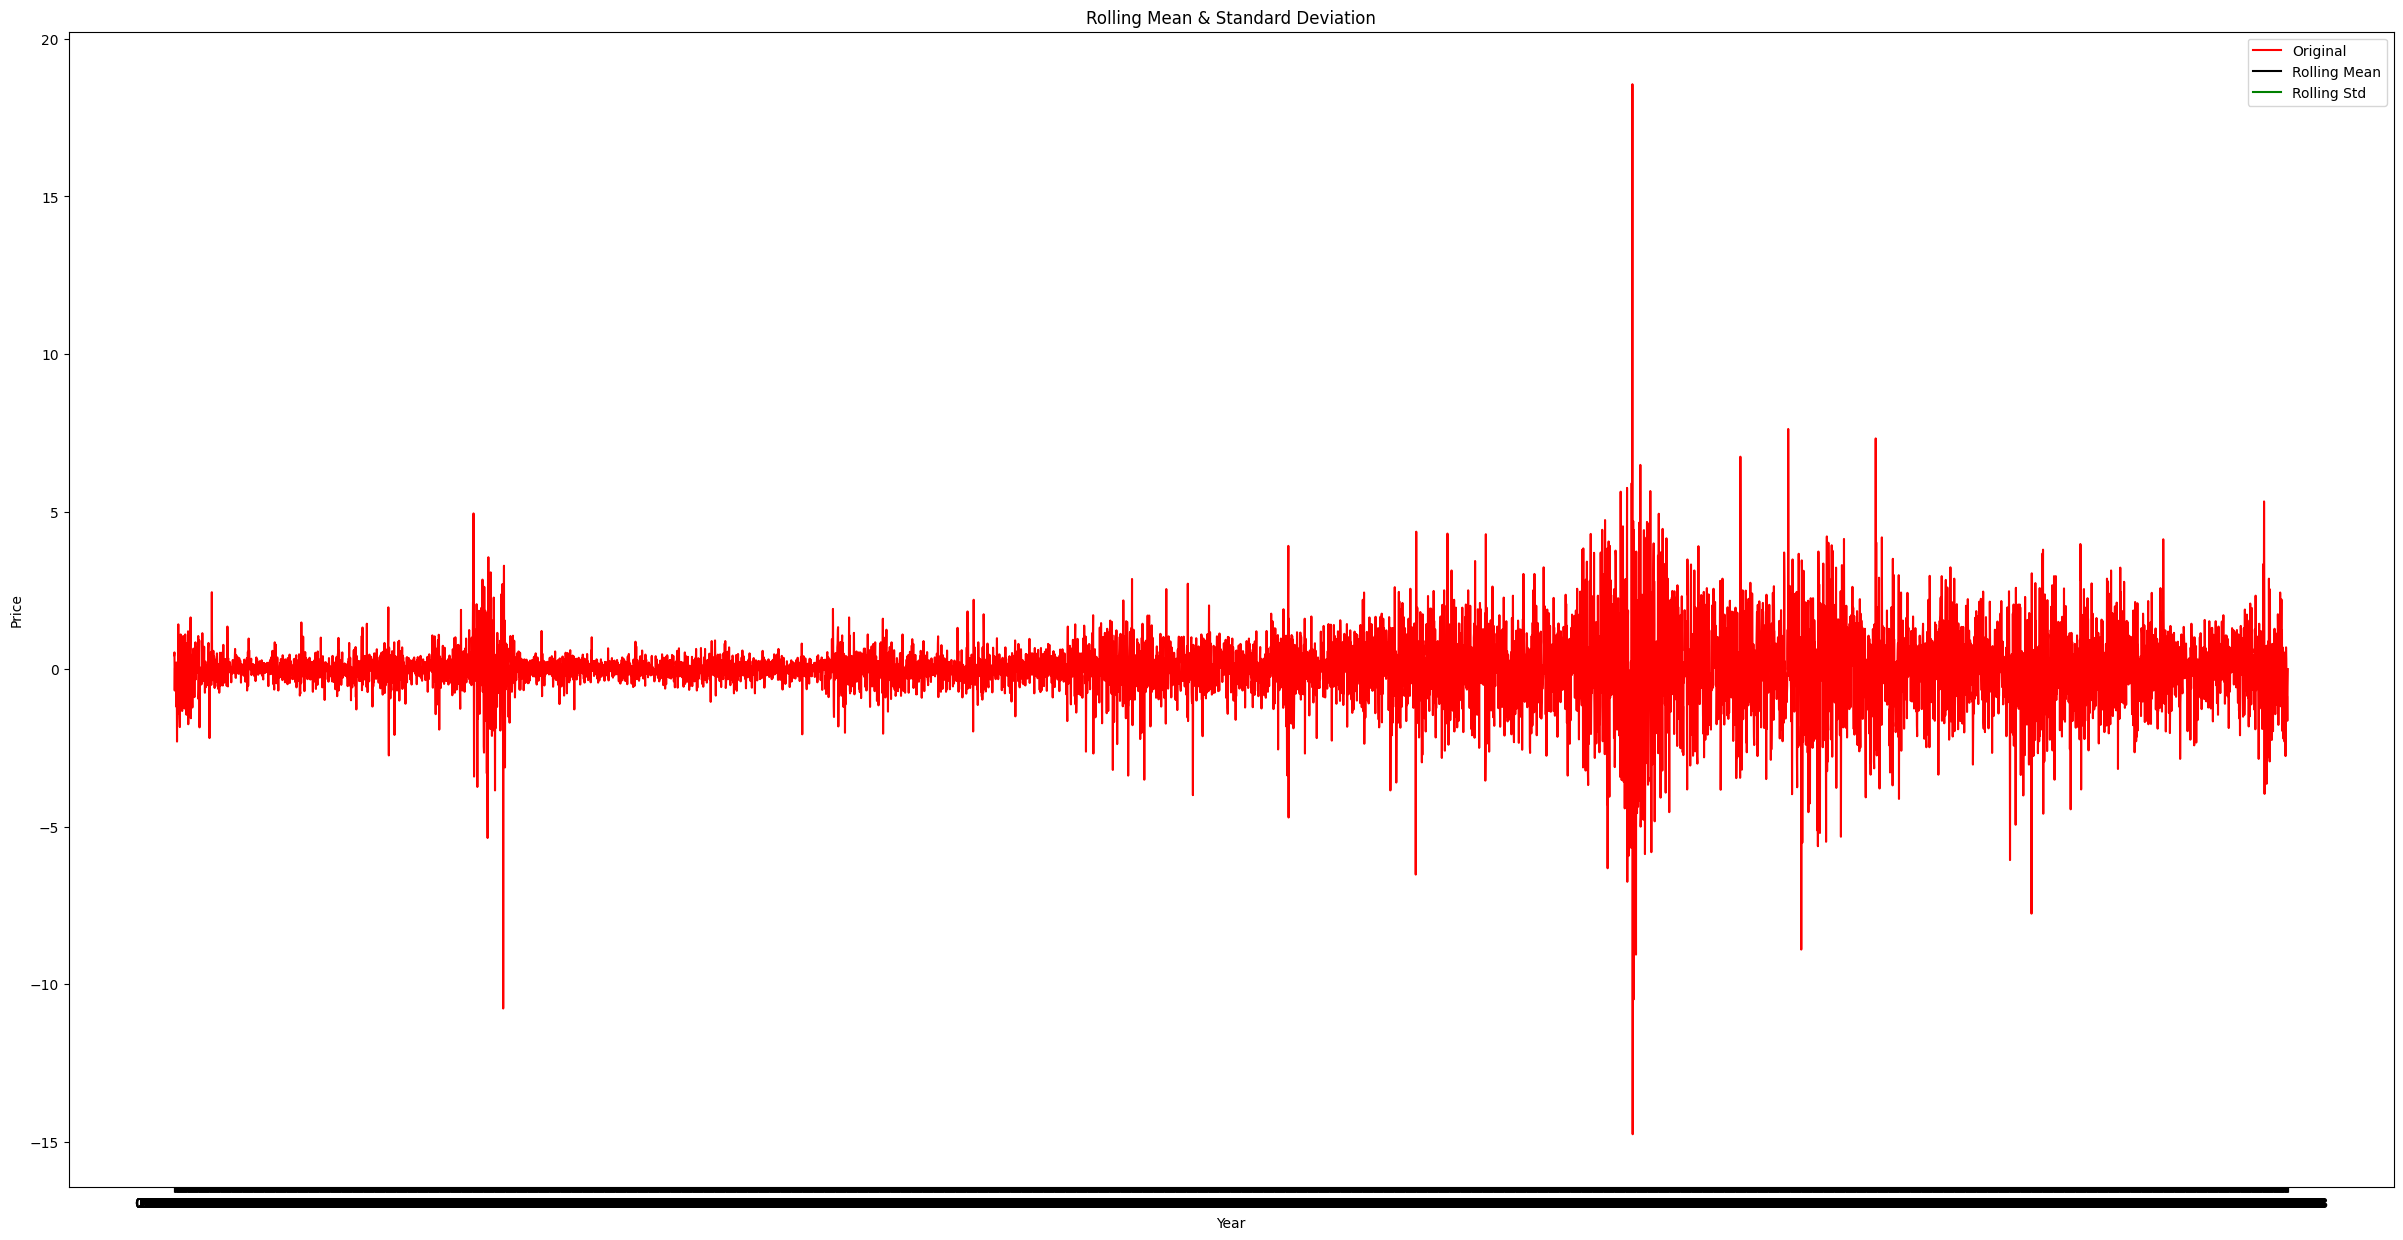

Test statistic: -13.299512856761663
p-value: 7.094155448591663e-25
Critical Values: {'1%': -3.4311452032308343, '5%': -2.8618914241795745, '10%': -2.56695705828814}


In [87]:
def check_adfuller(dataframe_first_diff):
    result = adfuller(dataframe_first_diff,autolag='AIC')
    print('Test statistic:',result[0])
    print('p-value:',result[1])
    print('Critical Values:',result[4])
def check_mean_std(dataframe_first_diff):
    dataframe_first_diff_log = np.log(dataframe_first_diff)
    moving_avg1 = dataframe_first_diff_log.rolling(12).mean()
    moving_std1 = dataframe_first_diff_log.rolling(12).std()
    plt.figure(figsize=(30,15))
    orig = plt.plot(dataframe_first_diff, color = 'red',label = 'Original')
    mean = plt.plot(moving_avg1, color = 'black',label= 'Rolling Mean')
    std = plt.plot(moving_std1, color = 'green',label= 'Rolling Std')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
check_mean_std(dataframe_first_diff)
check_adfuller(dataframe_first_diff.Price)

In [88]:
#data before applying differencing #non stationary
data3

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


In [89]:
number_of_data_points = len(data3)
number_of_data_points

8264

In [90]:
#data after applying differencing #stationary
data5 = dataframe_first_diff.copy()
data5

,Price
Date,
03-01-1986,0.44
06-01-1986,0.53
07-01-1986,-0.68
08-01-1986,0.02
09-01-1986,0.16
...,...
30-10-2018,-0.82
31-10-2018,-0.87
01-11-2018,-1.64


In [91]:
data4

,Date,Price,Month,Year
0,1986-02-01,25.56,Feb,1986
1,1986-03-01,26.00,Mar,1986
2,1986-06-01,26.53,Jun,1986
3,1986-07-01,25.85,Jul,1986
4,1986-08-01,25.87,Aug,1986
...,...,...,...,...
8259,2018-10-30,66.18,Oct,2018
8260,2018-10-31,65.31,Oct,2018
8261,2018-01-11,63.67,Jan,2018
8262,2018-02-11,63.12,Feb,2018


In [92]:
data6= data4.copy()
data6

,Date,Price,Month,Year
0,1986-02-01,25.56,Feb,1986
1,1986-03-01,26.00,Mar,1986
2,1986-06-01,26.53,Jun,1986
3,1986-07-01,25.85,Jul,1986
4,1986-08-01,25.87,Aug,1986
...,...,...,...,...
8259,2018-10-30,66.18,Oct,2018
8260,2018-10-31,65.31,Oct,2018
8261,2018-01-11,63.67,Jan,2018
8262,2018-02-11,63.12,Feb,2018


In [93]:
X =pd.DataFrame({"t":range(1,8264)})
X

,t
0,1
1,2
2,3
3,4
4,5
...,...
8258,8259
8259,8260
8260,8261
8261,8262


In [94]:
X['t_square'] = X['t']**2
X

,t,t_square
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
...,...,...
8258,8259,68211081
8259,8260,68227600
8260,8261,68244121
8261,8262,68260644


In [95]:
data7=data6.drop('Year', axis=1)
data7

,Date,Price,Month
0,1986-02-01,25.56,Feb
1,1986-03-01,26.00,Mar
2,1986-06-01,26.53,Jun
3,1986-07-01,25.85,Jul
4,1986-08-01,25.87,Aug
...,...,...,...
8259,2018-10-30,66.18,Oct
8260,2018-10-31,65.31,Oct
8261,2018-01-11,63.67,Jan
8262,2018-02-11,63.12,Feb


In [96]:
data7['log_Price'] = np.log(data7['Price'])
data7

,Date,Price,Month,log_Price
0,1986-02-01,25.56,Feb,3.241029
1,1986-03-01,26.00,Mar,3.258097
2,1986-06-01,26.53,Jun,3.278276
3,1986-07-01,25.85,Jul,3.252311
4,1986-08-01,25.87,Aug,3.253084
...,...,...,...,...
8259,2018-10-30,66.18,Oct,4.192378
8260,2018-10-31,65.31,Oct,4.179145
8261,2018-01-11,63.67,Jan,4.153713
8262,2018-02-11,63.12,Feb,4.145038


In [97]:
data8=pd.get_dummies(data7, columns=['Month'])
data8

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,1986-02-01,25.56,3.241029,0,0,0,1,0,0,0,0,0,0,0,0
1,1986-03-01,26.00,3.258097,0,0,0,0,0,0,0,1,0,0,0,0
2,1986-06-01,26.53,3.278276,0,0,0,0,0,0,1,0,0,0,0,0
3,1986-07-01,25.85,3.252311,0,0,0,0,0,1,0,0,0,0,0,0
4,1986-08-01,25.87,3.253084,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,2018-10-30,66.18,4.192378,0,0,0,0,0,0,0,0,0,0,1,0
8260,2018-10-31,65.31,4.179145,0,0,0,0,0,0,0,0,0,0,1,0
8261,2018-01-11,63.67,4.153713,0,0,0,0,1,0,0,0,0,0,0,0
8262,2018-02-11,63.12,4.145038,0,0,0,1,0,0,0,0,0,0,0,0


In [98]:
data9=pd.concat([data8, X], axis=1)
data9

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
0,1986-02-01,25.56,3.241029,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0
1,1986-03-01,26.00,3.258097,0,0,0,0,0,0,0,1,0,0,0,0,2.0,4.0
2,1986-06-01,26.53,3.278276,0,0,0,0,0,0,1,0,0,0,0,0,3.0,9.0
3,1986-07-01,25.85,3.252311,0,0,0,0,0,1,0,0,0,0,0,0,4.0,16.0
4,1986-08-01,25.87,3.253084,0,1,0,0,0,0,0,0,0,0,0,0,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,2018-10-30,66.18,4.192378,0,0,0,0,0,0,0,0,0,0,1,0,8260.0,68227600.0
8260,2018-10-31,65.31,4.179145,0,0,0,0,0,0,0,0,0,0,1,0,8261.0,68244121.0
8261,2018-01-11,63.67,4.153713,0,0,0,0,1,0,0,0,0,0,0,0,8262.0,68260644.0
8262,2018-02-11,63.12,4.145038,0,0,0,1,0,0,0,0,0,0,0,0,8263.0,68277169.0


In [99]:
 data9.dropna()

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
0,1986-02-01,25.56,3.241029,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0
1,1986-03-01,26.00,3.258097,0,0,0,0,0,0,0,1,0,0,0,0,2.0,4.0
2,1986-06-01,26.53,3.278276,0,0,0,0,0,0,1,0,0,0,0,0,3.0,9.0
3,1986-07-01,25.85,3.252311,0,0,0,0,0,1,0,0,0,0,0,0,4.0,16.0
4,1986-08-01,25.87,3.253084,0,1,0,0,0,0,0,0,0,0,0,0,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2018-10-29,67.00,4.204693,0,0,0,0,0,0,0,0,0,0,1,0,8259.0,68211081.0
8259,2018-10-30,66.18,4.192378,0,0,0,0,0,0,0,0,0,0,1,0,8260.0,68227600.0
8260,2018-10-31,65.31,4.179145,0,0,0,0,0,0,0,0,0,0,1,0,8261.0,68244121.0
8261,2018-01-11,63.67,4.153713,0,0,0,0,1,0,0,0,0,0,0,0,8262.0,68260644.0


In [100]:
data10=data9.dropna()

In [101]:
data10

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
0,1986-02-01,25.56,3.241029,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0
1,1986-03-01,26.00,3.258097,0,0,0,0,0,0,0,1,0,0,0,0,2.0,4.0
2,1986-06-01,26.53,3.278276,0,0,0,0,0,0,1,0,0,0,0,0,3.0,9.0
3,1986-07-01,25.85,3.252311,0,0,0,0,0,1,0,0,0,0,0,0,4.0,16.0
4,1986-08-01,25.87,3.253084,0,1,0,0,0,0,0,0,0,0,0,0,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2018-10-29,67.00,4.204693,0,0,0,0,0,0,0,0,0,0,1,0,8259.0,68211081.0
8259,2018-10-30,66.18,4.192378,0,0,0,0,0,0,0,0,0,0,1,0,8260.0,68227600.0
8260,2018-10-31,65.31,4.179145,0,0,0,0,0,0,0,0,0,0,1,0,8261.0,68244121.0
8261,2018-01-11,63.67,4.153713,0,0,0,0,1,0,0,0,0,0,0,0,8262.0,68260644.0


In [102]:
### Partitioning the data

In [103]:
Train = data10.head(5453) #66%
Test = data10.tail(2810) #33%

In [104]:
Train

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
0,1986-02-01,25.56,3.241029,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0
1,1986-03-01,26.00,3.258097,0,0,0,0,0,0,0,1,0,0,0,0,2.0,4.0
2,1986-06-01,26.53,3.278276,0,0,0,0,0,0,1,0,0,0,0,0,3.0,9.0
3,1986-07-01,25.85,3.252311,0,0,0,0,0,1,0,0,0,0,0,0,4.0,16.0
4,1986-08-01,25.87,3.253084,0,1,0,0,0,0,0,0,0,0,0,0,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,2007-06-08,72.03,4.277083,0,0,0,0,0,0,1,0,0,0,0,0,5449.0,29691601.0
5449,2007-07-08,72.25,4.280132,0,0,0,0,0,1,0,0,0,0,0,0,5450.0,29702500.0
5450,2007-08-08,72.23,4.279855,0,1,0,0,0,0,0,0,0,0,0,0,5451.0,29713401.0
5451,2007-09-08,71.62,4.271374,0,0,0,0,0,0,0,0,0,0,0,1,5452.0,29724304.0


In [105]:
Test

,Date,Price,log_Price,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,t,t_square
5453,2007-08-13,71.60,4.271095,0,1,0,0,0,0,0,0,0,0,0,0,5454.0,29746116.0
5454,2007-08-14,72.40,4.282206,0,1,0,0,0,0,0,0,0,0,0,0,5455.0,29757025.0
5455,2007-08-15,73.36,4.295379,0,1,0,0,0,0,0,0,0,0,0,0,5456.0,29767936.0
5456,2007-08-16,70.99,4.262539,0,1,0,0,0,0,0,0,0,0,0,0,5457.0,29778849.0
5457,2007-08-17,71.90,4.275276,0,1,0,0,0,0,0,0,0,0,0,0,5458.0,29789764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2018-10-29,67.00,4.204693,0,0,0,0,0,0,0,0,0,0,1,0,8259.0,68211081.0
8259,2018-10-30,66.18,4.192378,0,0,0,0,0,0,0,0,0,0,1,0,8260.0,68227600.0
8260,2018-10-31,65.31,4.179145,0,0,0,0,0,0,0,0,0,0,1,0,8261.0,68244121.0
8261,2018-01-11,63.67,4.153713,0,0,0,0,1,0,0,0,0,0,0,0,8262.0,68260644.0


In [106]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [107]:
### Model Building

In [108]:
### Linear

In [109]:
linear_model = smf.ols('Price~t',data=Train).fit()
pred_linear_model = pd.Series(linear_model.predict(pd.DataFrame(Test)))
pred_linear_model

5453    45.481461
5454    45.488253
5455    45.495046
5456    45.501838
5457    45.508630
          ...    
8258    64.534036
8259    64.540828
8260    64.547620
8261    64.554413
8262    64.561205
Length: 2810, dtype: float64

In [110]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     6046.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:10:47   Log-Likelihood:                -20376.
No. Observations:                5453   AIC:                         4.076e+04
Df Residuals:                    5451   BIC:                         4.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4359      0.275     30.671      0.000       7.897       8.975
t              0.0068   8.74e-05     77.759      0.000       0.007       0.007
==============================================================================
Omnibus:                      393.889   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.960
Skew:                           0.701   Prob(JB):                    1.34e-105
Kurtosis:                       3.399   Cond. No.                     6.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
MAPE_linear=MAPE(pred_linear_model,Test.Price)
MAPE_linear

34.55039439906912

In [112]:
rmse_linear_model= np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear_model))**2))
rmse_linear_model

32.92188854076976

In [113]:
### Exponential

In [114]:
exp_model = smf.ols('log_Price~t',data=Train).fit()
pred_exp_model = pd.Series(exp_model.predict(pd.DataFrame(Test)))
pred_exp_model

5453    3.755213
5454    3.755423
5455    3.755633
5456    3.755843
5457    3.756052
          ...   
8258    4.343619
8259    4.343829
8260    4.344038
8261    4.344248
8262    4.344458
Length: 2810, dtype: float64

In [115]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     6941.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:10:47   Log-Likelihood:                -1036.7
No. Observations:                5453   AIC:                             2077.
Df Residuals:                    5451   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6111      0.008    329.341      0.000       2.596       2.627
t              0.0002   2.52e-06     83.310      0.000       0.000       0.000
==============================================================================
Omnibus:                       35.512   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.139
Skew:                          -0.164   Prob(JB):                     5.23e-09
Kurtosis:                       3.244   Cond. No.                     6.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
MAPE_exp=MAPE(pred_exp_model,Test.Price)
MAPE_exp

93.95348535839338

In [117]:
rmse_exp_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_exp_model)))**2))
rmse_exp_model

33.69469232153678

In [118]:
### Quadratic

In [119]:
quad_model = smf.ols('Price~t+t_square',data=Train).fit()
pred_quad_model = pd.Series(quad_model.predict(Test))
pred_quad_model

5453     62.515744
5454     62.541276
5455     62.566815
5456     62.592361
5457     62.617913
           ...    
8258    161.152281
8259    161.197085
8260    161.241896
8261    161.286713
8262    161.331538
Length: 2810, dtype: float64

In [120]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:10:47   Log-Likelihood:                -18122.
No. Observations:                5453   AIC:                         3.625e+04
Df Residuals:                    5450   BIC:                         3.627e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4702      0.273     93.301      0.000      24.935      26.005
t             -0.0119      0.000    -51.664      0.000      -0.012      -0.011
t_square    3.435e-06    4.1e-08     83.701      0.000    3.35e-06    3.52e-06
==============================================================================
Omnibus:                       54.449   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.281
Skew:                           0.224   Prob(JB):                     3.64e-13
Kurtosis:                       3.226   Cond. No.                     3.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
MAPE_quad=MAPE(pred_quad_model,Test.Price)
MAPE_quad

74.25740841771815

In [122]:
rmse_quad_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_quad_model)))**2))
rmse_quad_model

7.495002098991168e+68

In [123]:
### Additive seasonality

In [124]:
add_sea_model = smf.ols('Price~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data=Train).fit()
pred_add_sea_model = pd.Series(add_sea_model.predict(Test))
pred_add_sea_model

5453    27.281936
5454    27.281936
5455    27.281936
5456    27.281936
5457    27.281936
          ...    
8258    26.989701
8259    26.989701
8260    26.989701
8261    26.562357
8262    26.457019
Length: 2810, dtype: float64

In [125]:
add_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5396
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.878
Time:                        09:10:47   Log-Likelihood:                -22408.
No. Observations:                5453   AIC:                         4.484e+04
Df Residuals:                    5441   BIC:                         4.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8710      0.185    134.748      0.000      24.509      25.233
Month_Jan      1.6913      0.663      2.551      0.011       0.391       2.991
Month_Feb      1.5860      0.690      2.297      0.022       0.232       2.940
Month_Mar      1.8656      0.651      2.867      0.004       0.590       3.141
Month_Apr      1.5746      0.672      2.343      0.019       0.257       2.892
Month_May      2.2525      0.662      3.404      0.001       0.955       3.550
Month_Jun      2.8203      0.655      4.309      0.000       1.537       4.103
Month_Jul      2.9189      0.644      4.529      0.000       1.656       4.182
Month_Aug      2.4109      0.653      3.694      0.000       1.132       3.690
Month_Sep      2.5191      0.662      3.803      0.000       1.221       3.818
Month_Oct      2.1187      0.653      3.243      0.001       0.838       3.399
Month_Nov      1.5599      0.683      2.284      0.022       0.221       2.899
Month_Dec      1.5532      0.671      2.316      0.021       0.238       2.868
==============================================================================
Omnibus:                     1606.325   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3595.324
Skew:                           1.719   Prob(JB):                         0.00
Kurtosis:                       5.000   Cond. No.                     3.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
MAPE_add_sea=MAPE(pred_add_sea_model,Test.Price)
MAPE_add_sea

60.03958822466963

In [127]:
rmse_add_sea_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea_model))**2))
rmse_add_sea_model

53.4420316202257

In [128]:
### Additive Seasonality Quadratic

In [129]:
add_sea_quad_model = smf.ols('Price~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data=Train).fit()
pred_add_sea_quad_model = pd.Series(add_sea_quad_model.predict(Test))
pred_add_sea_quad_model

5453     63.219294
5454     63.244838
5455     63.270388
5456     63.295945
5457     63.321509
           ...    
8258    161.503506
8259    161.548335
8260    161.593171
8261    161.143943
8262    160.838206
Length: 2810, dtype: float64

In [130]:
add_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1606.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:10:48   Log-Likelihood:                -18112.
No. Observations:                5453   AIC:                         3.625e+04
Df Residuals:                    5439   BIC:                         3.634e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5165      0.252     93.363      0.000      23.023      24.010
t             -0.0120      0.000    -51.744      0.000      -0.012      -0.012
t_square    3.438e-06    4.1e-08     83.786      0.000    3.36e-06    3.52e-06
Month_Jan      1.7687      0.302      5.855      0.000       1.176       2.361
Month_Feb      1.4181      0.315      4.509      0.000       0.802       2.035
Month_Mar      1.5558      0.297      5.246      0.000       0.974       2.137
Month_Apr      1.5365      0.306      5.017      0.000       0.936       2.137
Month_May      1.8625      0.302      6.175      0.000       1.271       2.454
Month_Jun      2.1615      0.298      7.244      0.000       1.577       2.746
Month_Jul      2.3135      0.294      7.874      0.000       1.738       2.890
Month_Aug      2.6657      0.298      8.953      0.000       2.082       3.249
Month_Sep      2.5770      0.302      8.528      0.000       1.985       3.169
Month_Oct      2.2628      0.298      7.592      0.000       1.679       2.847
Month_Nov      1.8889      0.311      6.065      0.000       1.278       2.499
Month_Dec      1.5053      0.306      4.918      0.000       0.905       2.105
==============================================================================
Omnibus:                       45.122   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.756
Skew:                           0.207   Prob(JB):                     7.03e-11
Kurtosis:                       3.183   Cond. No.                     1.67e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [131]:
MAPE_add_sea_quad=MAPE(pred_add_sea_quad_model,Test.Price)
MAPE_add_sea_quad

74.32677808524484

In [132]:
rmse_add_sea_quad_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_add_sea_quad_model))**2))
rmse_add_sea_quad_model


55.026388454459855

In [133]:
### Multiplicative Seasonality

In [134]:
mul_sea_model = smf.ols('log_Price~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data = Train).fit()
pred_mult_sea_model = pd.Series(mul_sea_model.predict(Test))
pred_mult_sea_model

5453    3.195359
5454    3.195359
5455    3.195359
5456    3.195359
5457    3.195359
          ...   
8258    3.191405
8259    3.191405
8260    3.191405
8261    3.174641
8262    3.164203
Length: 2810, dtype: float64

In [135]:
mul_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4611
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.928
Time:                        09:10:48   Log-Likelihood:                -3273.2
No. Observations:                5453   AIC:                             6570.
Df Residuals:                    5441   BIC:                             6650.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9379      0.006    531.860      0.000       2.927       2.949
Month_Jan      0.2367      0.020     11.928      0.000       0.198       0.276
Month_Feb      0.2263      0.021     10.950      0.000       0.186       0.267
Month_Mar      0.2362      0.019     12.128      0.000       0.198       0.274
Month_Apr      0.2297      0.020     11.422      0.000       0.190       0.269
Month_May      0.2550      0.020     12.876      0.000       0.216       0.294
Month_Jun      0.2599      0.020     13.266      0.000       0.221       0.298
Month_Jul      0.2589      0.019     13.422      0.000       0.221       0.297
Month_Aug      0.2574      0.020     13.181      0.000       0.219       0.296
Month_Sep      0.2629      0.020     13.262      0.000       0.224       0.302
Month_Oct      0.2535      0.020     12.966      0.000       0.215       0.292
Month_Nov      0.2321      0.020     11.357      0.000       0.192       0.272
Month_Dec      0.2294      0.020     11.431      0.000       0.190       0.269
==============================================================================
Omnibus:                      644.278   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              896.852
Skew:                           0.987   Prob(JB):                    1.78e-195
Kurtosis:                       3.219   Cond. No.                     3.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
MAPE_mult_sea=MAPE(pred_mult_sea_model,Test.Price)
MAPE_mult_sea

95.27954123454691

In [137]:
rmse_mult_sea_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_mult_sea_model)))**2))
rmse_mult_sea_model

56.012087120349705

In [138]:
### Multiplicative Additive Seasonality

In [139]:
mult_add_sea_model = smf.ols('log_Price~t+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_May+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec',data = Train).fit()
pred_mult_add_sea_model = pd.Series(mult_add_sea_model.predict(Test))
pred_mult_add_sea_model

5453    3.768996
5454    3.769205
5455    3.769415
5456    3.769625
5457    3.769835
          ...   
8258    4.350992
8259    4.351202
8260    4.351412
8261    4.347055
8262    4.332263
Length: 2810, dtype: float64

In [140]:
mult_add_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     578.8
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:10:48   Log-Likelihood:                -1032.5
No. Observations:                5453   AIC:                             2091.
Df Residuals:                    5440   BIC:                             2177.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4100      0.007    329.169      0.000       2.396       2.424
t              0.0002   2.52e-06     83.271      0.000       0.000       0.000
Month_Jan      0.2040      0.013     15.495      0.000       0.178       0.230
Month_Feb      0.1890      0.014     13.785      0.000       0.162       0.216
Month_Mar      0.1926      0.013     14.907      0.000       0.167       0.218
Month_Apr      0.1916      0.013     14.357      0.000       0.165       0.218
Month_May      0.2088      0.013     15.885      0.000       0.183       0.235
Month_Jun      0.2072      0.013     15.935      0.000       0.182       0.233
Month_Jul      0.2065      0.013     16.127      0.000       0.181       0.232
Month_Aug      0.2149      0.013     16.583      0.000       0.190       0.240
Month_Sep      0.2173      0.013     16.513      0.000       0.191       0.243
Month_Oct      0.2086      0.013     16.074      0.000       0.183       0.234
Month_Nov      0.1924      0.014     14.188      0.000       0.166       0.219
Month_Dec      0.1772      0.013     13.297      0.000       0.151       0.203
==============================================================================
Omnibus:                       33.462   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.347
Skew:                          -0.165   Prob(JB):                     2.11e-08
Kurtosis:                       3.217   Cond. No.                     4.72e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [141]:
MAPE_mult_add_sea=MAPE(pred_mult_add_sea_model,Test.Price)
MAPE_mult_add_sea

93.9537720135984

In [142]:
rmse_mult_add_sea_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_mult_add_sea_model)))**2))
rmse_mult_add_sea_model

33.69321658383081

In [143]:
### RMSE, MAPE values table

In [144]:
#Compare the results
df = {"MODEL":pd.Series(["Linear_model","Exp_model","Quad_model","Add_sea_model","Add_sea_quad_model","Mult_sea_model","Mult_add_sea_model"]),"RMSE_Values":pd.Series([rmse_linear_model,rmse_exp_model,rmse_quad_model,rmse_add_sea_model,rmse_add_sea_quad_model,rmse_mult_sea_model,rmse_mult_add_sea_model]),"MAPE_Values":pd.Series([MAPE_linear,MAPE_exp,MAPE_quad,MAPE_add_sea,MAPE_add_sea_quad,MAPE_mult_sea,MAPE_mult_add_sea])}
table=pd.DataFrame(df)
table

,MODEL,RMSE_Values,MAPE_Values
0,Linear_model,3.292189e+01,34.550394
1,Exp_model,3.369469e+01,93.953485
2,Quad_model,7.495002e+68,74.257408
3,Add_sea_model,5.344203e+01,60.039588
4,Add_sea_quad_model,5.502639e+01,74.326778
5,Mult_sea_model,5.601209e+01,95.279541
6,Mult_add_sea_model,3.369322e+01,93.953772


In [145]:
### ARIMA Model

In [146]:
Train1 = data5.head(5453) #66.6%
Test1 = data5.tail(2810) #33.3%

In [147]:
Train1

,Price
Date,
03-01-1986,0.44
06-01-1986,0.53
07-01-1986,-0.68
08-01-1986,0.02
09-01-1986,0.16
...,...
07-08-2007,0.22
08-08-2007,-0.02
09-08-2007,-0.61


In [148]:
Test1

,Price
Date,
14-08-2007,0.80
15-08-2007,0.96
16-08-2007,-2.37
17-08-2007,0.91
20-08-2007,-0.78
...,...
30-10-2018,-0.82
31-10-2018,-0.87
01-11-2018,-1.64


In [149]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [150]:
import pmdarima as pmd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [151]:
stepwise_fit = auto_arima(data5['Price'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25293.753, Time=9.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25326.493, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25310.144, Time=0.84 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25309.430, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25324.629, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=25313.418, Time=3.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.75 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25310.354, Time=1.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=25308.516, Time=3.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=25308.077, Time=2.33 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=25286.485, Time=12.60 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=25288.493, Time=12.84 sec
 ARIMA(3,0,4)(0,0,0)[0] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8263
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -12635.317
Date:                Thu, 01 Feb 2024   AIC                          25284.635
Time:                        09:13:59   BIC                          25333.772
Sample:                             0   HQIC                         25301.426
                               - 8263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4846      0.074    -19.953      0.000      -1.630      -1.339
ar.L2         -1.2934      0.072    -17.911      0.000      -1.435      -1.152
ar.L3         -0.5147      0.068     -7.624      0.000      -0.647      -0.382
ma.L1          1.4386      0.075     19.130      0.000       1.291       1.586
ma.L2          1.2094      0.073     16.574      0.000       1.066       1.352
ma.L3          0.4514      0.068      6.664      0.000       0.319       0.584
sigma2         1.2465      0.007    186.674      0.000       1.233       1.260
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            126724.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.51   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
arima_model=ARIMA(Train1['Price'],order=(0,0,2))
arima_model=arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 5453
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -5917.954
Date:                Thu, 01 Feb 2024   AIC                          11843.907
Time:                        09:14:01   BIC                          11870.323
Sample:                             0   HQIC                         11853.125
                               - 5453                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.009      0.901      0.368      -0.010       0.027
ma.L1         -0.0376      0.008     -4.684      0.000      -0.053      -0.022
ma.L2         -0.0234      0.008     -2.979      0.003      -0.039      -0.008
sigma2         0.5131      0.004    146.056      0.000       0.506       0.520
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55961.94
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
start = len(Train1)
end = len(Train1) + len(Test1) - 1

In [154]:
start

5453

In [155]:
end

8262

In [156]:
pred_arima_model = arima_model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred_arima_model

5453    0.009234
5454    0.006546
5455    0.008436
5456    0.008436
5457    0.008436
          ...   
8258    0.008436
8259    0.008436
8260    0.008436
8261    0.008436
8262    0.008436
Name: ARIMA Predictions, Length: 2810, dtype: float64

<Axes: xlabel='Date'>

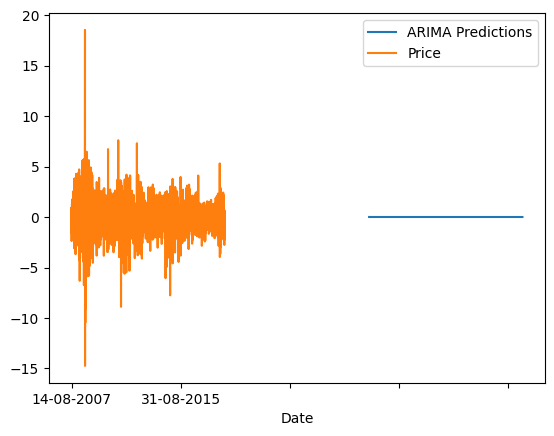

In [157]:
pred_arima_model.plot(legend=True)
Test1['Price'].plot(legend=True)

In [158]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [159]:
rmse_arima_model=sqrt(mean_squared_error(pred_arima_model,Test1['Price']))
print(rmse_arima_model)

1.6405321977578255


In [233]:
mape_arima=MAPE(pred_arima_model,Test.Price)

In [234]:
mape_arima

99.98749016669129

In [160]:
### Data Driven Methods

In [161]:
### Simple Exponential Method

In [162]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [163]:
Train["Price"] = Train["Price"].astype('double')

In [164]:
ses_model = SimpleExpSmoothing(Train["Price"]).fit(smoothing_level=0.2) #alpha = 0.2
pred_ses_model = ses_model.predict(start = Test.index[0],end = Test.index[-1])
pred_ses_model

5453    73.222656
5454    73.222656
5455    73.222656
5456    73.222656
5457    73.222656
          ...    
8258    73.222656
8259    73.222656
8260    73.222656
8261    73.222656
8262    73.222656
Length: 2810, dtype: float64

In [165]:
MAPE_ses=MAPE(pred_ses_model,Test['Price'])
MAPE_ses

31.043251799531333

In [166]:
rmse_ses_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_ses_model)))**2))
rmse_ses_model

6.312414615130904e+31

In [167]:
### Holt method

In [168]:
holt_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.2) #alpha = 0.8, beta= 0.2
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])
pred_holt_model

5453      70.939973
5454      70.473313
5455      70.006652
5456      69.539992
5457      69.073332
           ...     
8258   -1238.041880
8259   -1238.508540
8260   -1238.975200
8261   -1239.441860
8262   -1239.908520
Length: 2810, dtype: float64

In [169]:
MAPE_holt=MAPE(pred_holt_model,Test.Price)
MAPE_holt

1056.646059800797

In [170]:
rmse_holt_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_holt_model)))**2))
rmse_holt_model

1.5594777491561233e+29

In [171]:
### Holts winter exponential smoothing with additive seasonality and additive trend

In [172]:
hwe_add_add_model = ExponentialSmoothing(Train["Price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add_model = hwe_add_add_model.predict(start = Test.index[0],end = Test.index[-1])
pred_hwe_add_add_model

5453    71.501326
5454    71.556773
5455    71.622931
5456    71.636737
5457    71.619335
          ...    
8258    95.154444
8259    95.163363
8260    95.150611
8261    95.156715
8262    95.212162
Length: 2810, dtype: float64

In [173]:
MAPE_hwe_add_add=MAPE(pred_hwe_add_add_model,Test.Price)
MAPE_hwe_add_add

40.34332314302943

In [174]:
rmse_hwe_add_add_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_hwe_add_add_model)))**2))
rmse_hwe_add_add_model

3.2575284010260176e+40

In [175]:
### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [176]:
hwe_mult_add_model= ExponentialSmoothing(Train["Price"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mult_add_model = hwe_mult_add_model.predict(start = Test.index[0],end = Test.index[-1])
pred_hwe_mult_add_model

5453    71.436135
5454    71.552751
5455    71.754909
5456    71.797542
5457    71.709625
          ...    
8258    95.077492
8259    95.144424
8260    95.064388
8261    94.985229
8262    95.137519
Length: 2810, dtype: float64

In [177]:
MAPE_hwe_mult_add=MAPE(pred_hwe_mult_add_model,Test.Price)
MAPE_hwe_mult_add

40.336913352491024

In [178]:
rmse_hwe_mult_add_model = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_hwe_mult_add_model)))**2))
rmse_hwe_mult_add_model

3.2598059465671445e+40

In [179]:
### RMSE, MAPE values table

In [180]:
df1 = {"MODEL":pd.Series(["Ses_model","Holt_model","Hwe_add_add_model ","Hwe_mult_add_model"]),"RMSE_Values":pd.Series([rmse_ses_model,rmse_holt_model,rmse_hwe_add_add_model ,rmse_hwe_mult_add_model]), "MAPE_Values":pd.Series([MAPE_ses,MAPE_holt,MAPE_hwe_add_add,MAPE_hwe_mult_add])}

table1=pd.DataFrame(df1)
table1

,MODEL,RMSE_Values,MAPE_Values
0,Ses_model,6.312415e+31,31.043252
1,Holt_model,1.559478e+29,1056.646060
2,Hwe_add_add_model,3.257528e+40,40.343323
3,Hwe_mult_add_model,3.259806e+40,40.336913


In [181]:
### FB Prophet Model

In [182]:
!pip install prophet

In [183]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [184]:
data11=data3.reset_index()
data11

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [185]:
data12=data11.copy()
data12

,Date,Price
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [186]:
data12.columns = ['ds','y']
data12

,ds,y
0,02-01-1986,25.56
1,03-01-1986,26.00
2,06-01-1986,26.53
3,07-01-1986,25.85
4,08-01-1986,25.87
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [187]:
data12.dtypes

ds     object
y     float64
dtype: object

In [188]:
data12['ds'] = pd.to_datetime(data12['ds'])
data12

,ds,y
0,1986-02-01,25.56
1,1986-03-01,26.00
2,1986-06-01,26.53
3,1986-07-01,25.85
4,1986-08-01,25.87
...,...,...
8259,2018-10-30,66.18
8260,2018-10-31,65.31
8261,2018-01-11,63.67
8262,2018-02-11,63.12


In [189]:
data12.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [190]:
#Data Partition
Train2 = data12.iloc[:len(data12)-150] # Total data except last 150 observations
Test2 = data12.iloc[len(data12)-150:] # Only last 150 observations

In [191]:
prophet_model = Prophet()
prophet_model.fit(Train2)
future = prophet_model.make_future_dataframe(periods=391)
forecast_prophet = prophet_model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gaqphrc/lg3jce5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4gaqphrc/gcboh9ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85934', 'data', 'file=/tmp/tmp4gaqphrc/lg3jce5u.json', 'init=/tmp/tmp4gaqphrc/gcboh9ev.json', 'output', 'file=/tmp/tmp4gaqphrc/prophet_model0ce5w412/prophet_model-20240201091409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [192]:
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-01-04,15.352002,1.283069,26.939276,15.352002,15.352002,-0.375822,-0.375822,-0.375822,0.439118,0.439118,0.439118,-0.814940,-0.814940,-0.814940,0.0,0.0,0.0,14.976181
1,1986-01-05,15.355563,2.392359,27.960250,15.355563,15.355563,-0.788241,-0.788241,-0.788241,-0.047417,-0.047417,-0.047417,-0.740824,-0.740824,-0.740824,0.0,0.0,0.0,14.567322
2,1986-01-07,15.362685,1.798279,27.252260,15.362685,15.362685,-0.591842,-0.591842,-0.591842,0.022594,0.022594,0.022594,-0.614436,-0.614436,-0.614436,0.0,0.0,0.0,14.770843
3,1986-01-08,15.366245,1.881833,27.282217,15.366245,15.366245,-0.908640,-0.908640,-0.908640,-0.344469,-0.344469,-0.344469,-0.564171,-0.564171,-0.564171,0.0,0.0,0.0,14.457606
4,1986-01-10,15.373367,2.179099,28.571221,15.373367,15.373367,-0.622320,-0.622320,-0.622320,-0.129701,-0.129701,-0.129701,-0.492619,-0.492619,-0.492619,0.0,0.0,0.0,14.751047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8500,2019-12-25,22.990327,8.590816,34.071857,21.372624,24.722956,-1.955462,-1.955462,-1.955462,-0.344469,-0.344469,-0.344469,-1.610993,-1.610993,-1.610993,0.0,0.0,0.0,21.034865
8501,2019-12-26,22.963743,8.573453,35.650402,21.338482,24.704683,-1.370574,-1.370574,-1.370574,0.191121,0.191121,0.191121,-1.561695,-1.561695,-1.561695,0.0,0.0,0.0,21.593169
8502,2019-12-27,22.937159,8.109891,34.590686,21.306107,24.686410,-1.632175,-1.632175,-1.632175,-0.129701,-0.129701,-0.129701,-1.502474,-1.502474,-1.502474,0.0,0.0,0.0,21.304983
8503,2019-12-28,22.910575,8.585888,35.052927,21.273772,24.668137,-0.995487,-0.995487,-0.995487,0.439118,0.439118,0.439118,-1.434606,-1.434606,-1.434606,0.0,0.0,0.0,21.915087


In [193]:
forecast_prophet [['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1986-01-04,14.976181,1.283069,26.939276
1,1986-01-05,14.567322,2.392359,27.960250
2,1986-01-07,14.770843,1.798279,27.252260
3,1986-01-08,14.457606,1.881833,27.282217
4,1986-01-10,14.751047,2.179099,28.571221
...,...,...,...,...
8500,2019-12-25,21.034865,8.590816,34.071857
8501,2019-12-26,21.593169,8.573453,35.650402
8502,2019-12-27,21.304983,8.109891,34.590686
8503,2019-12-28,21.915087,8.585888,35.052927


In [194]:
Fcast = forecast_prophet.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(Train2.set_index('ds'))
Fcast

,yhat,yhat_lower,yhat_upper,y
ds,,,,
1986-01-04,14.976181,1.283069,26.939276,11.13
1986-01-05,14.567322,2.392359,27.960250,13.80
1986-01-07,14.770843,1.798279,27.252260,12.39
1986-01-08,14.457606,1.881833,27.282217,11.56
1986-01-10,14.751047,2.179099,28.571221,15.23
...,...,...,...,...
2019-12-25,21.034865,8.590816,34.071857,NaN
2019-12-26,21.593169,8.573453,35.650402,NaN
2019-12-27,21.304983,8.109891,34.590686,NaN


In [195]:
Test2

,ds,y
8114,2018-06-04,62.03
8115,2018-09-04,63.40
8116,2018-10-04,65.48
8117,2018-11-04,66.81
8118,2018-12-04,67.07
...,...,...
8259,2018-10-30,66.18
8260,2018-10-31,65.31
8261,2018-01-11,63.67
8262,2018-02-11,63.12


In [196]:
### FB Prophet

In [197]:
pred_prophet = forecast_prophet.iloc[-391:]['yhat']
pred_prophet

8114    32.571081
8115    32.127341
8116    32.578421
8117    32.166149
8118    32.637699
          ...    
8500    21.034865
8501    21.593169
8502    21.304983
8503    21.915087
8504    21.477018
Name: yhat, Length: 391, dtype: float64

In [198]:
from  sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse

In [199]:
### Calculate MAE,MSE,R-Squared between expected and predicted values
y_true = Train2['y'].iloc[:8001]
y_pred = Fcast['yhat'].iloc[:8001]
mae = mean_absolute_error(y_true,y_pred)
mse = mean_squared_error(y_true,y_pred)
rmse = sqrt(mean_squared_error(y_true,y_pred))
print('rmse: %.2f' % rmse)
print('MAE: %.2f' % mae)
print('MSE: %.2f' % mse)
r = r2_score(y_true,y_pred)
print('R-squared Score: %.2f'% r)

rmse: 9.82
MAE: 6.15
MSE: 96.50
R-squared Score: 0.89


In [200]:
### Naive Model (Last Sample Method)

In [201]:
Train3 = data11.head(5453)
Test3 = data11.tail(2810)

In [202]:
y_hat=Test3.copy()
y_hat

,Date,Price
5454,14-08-2007,72.40
5455,15-08-2007,73.36
5456,16-08-2007,70.99
5457,17-08-2007,71.90
5458,20-08-2007,71.12
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [203]:
df3=np.asarray(Train3.Price)
df3

array([25.56, 26.  , 26.53, ..., 72.23, 71.62, 71.49])

In [204]:
y_hat['naive']=df3[len(df3)-1]
y_hat

,Date,Price,naive
5454,14-08-2007,72.40,71.49
5455,15-08-2007,73.36,71.49
5456,16-08-2007,70.99,71.49
5457,17-08-2007,71.90,71.49
5458,20-08-2007,71.12,71.49
...,...,...,...
8259,30-10-2018,66.18,71.49
8260,31-10-2018,65.31,71.49
8261,01-11-2018,63.67,71.49
8262,02-11-2018,63.12,71.49


In [205]:
rmse_naive_model = np.sqrt(np.mean((np.array(Test3['Price'])-np.array(np.exp(y_hat['naive'])))**2))
rmse_naive_model

1.1161241655063915e+31

In [206]:
### Simple Averages Method

In [207]:
y_hat_avg=Test3.copy()
y_hat_avg

,Date,Price
5454,14-08-2007,72.40
5455,15-08-2007,73.36
5456,16-08-2007,70.99
5457,17-08-2007,71.90
5458,20-08-2007,71.12
...,...,...
8259,30-10-2018,66.18
8260,31-10-2018,65.31
8261,01-11-2018,63.67
8262,02-11-2018,63.12


In [208]:
y_hat_avg['avg_forecast']=Train3['Price'].mean()
y_hat_avg

,Date,Price,avg_forecast
5454,14-08-2007,72.40,26.958691
5455,15-08-2007,73.36,26.958691
5456,16-08-2007,70.99,26.958691
5457,17-08-2007,71.90,26.958691
5458,20-08-2007,71.12,26.958691
...,...,...,...
8259,30-10-2018,66.18,26.958691
8260,31-10-2018,65.31,26.958691
8261,01-11-2018,63.67,26.958691
8262,02-11-2018,63.12,26.958691


In [209]:
rmse_simple_model = np.sqrt(np.mean((np.array(Test3['Price'])-np.array(np.exp(y_hat_avg['avg_forecast'])))**2))
rmse_simple_model

510517436074.5611

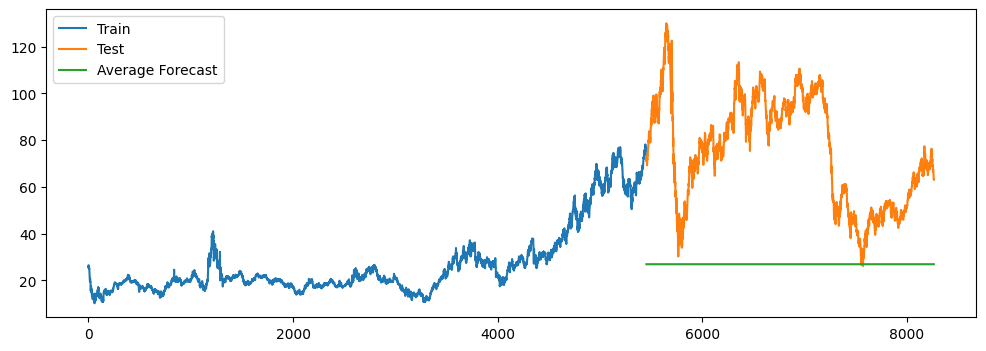

In [210]:
plt.figure(figsize=(12,4))
plt.plot(Train3['Price'], label='Train')
plt.plot(Test3['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [211]:
### Long Short Term Memory (LSTM) Model

In [212]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

In [213]:
data3

,Price
Date,
02-01-1986,25.56
03-01-1986,26.00
06-01-1986,26.53
07-01-1986,25.85
08-01-1986,25.87
...,...
30-10-2018,66.18
31-10-2018,65.31
01-11-2018,63.67


In [214]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data3)
scaled

array([[0.127807  ],
       [0.13148009],
       [0.1359045 ],
       ...,
       [0.44594707],
       [0.44135571],
       [0.44135571]])

In [215]:
train_size = int(len(scaled) * 0.66)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 5454
test: 2810


In [216]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [217]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

Streaming output truncated to the last 5000 lines.
1808
X 1808 to 1809
[0.49027465]
Y 1809
0.47366224225728354
1809
X 1809 to 1810
[0.47366224]
Y 1810
0.4762501043492779
1810
X 1810 to 1811
[0.4762501]
Y 1811
0.47149177727690134
1811
X 1811 to 1812
[0.47149178]
Y 1812
0.4644795058018199
1812
X 1812 to 1813
[0.46447951]
Y 1813
0.4414391852408382
1813
X 1813 to 1814
[0.44143919]
Y 1814
0.44653143000250445
1814
X 1814 to 1815
[0.44653143]
Y 1815
0.4235745888638451
1815
X 1815 to 1816
[0.42357459]
Y 1816
0.4153936054762501
1816
X 1816 to 1817
[0.41539361]
Y 1817
0.3970281325653227
1817
X 1817 to 1818
[0.39702813]
Y 1818
0.38158443943567916
1818
X 1818 to 1819
[0.38158444]
Y 1819
0.38166791885800155
1819
X 1819 to 1820
[0.38166792]
Y 1820
0.3855079722848318
1820
X 1820 to 1821
[0.38550797]
Y 1821
0.3667251022622924
1821
X 1821 to 1822
[0.3667251]
Y 1822
0.3895149845563069
1822
X 1822 to 1823
[0.38951498]
Y 1823
0.37565740045078894
1823
X 1823 to 1824
[0.3756574]
Y 1824
0.38842975206611574
1

In [218]:
## Reshaping the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(5452, 1, 1)
(2808, 1, 1)


In [219]:
batch_size = 1
model_lstm = Sequential()
model_lstm.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
5452/5452 - 21s - loss: 0.0036 - 21s/epoch - 4ms/step
Epoch 2/100
5452/5452 - 9s - loss: 6.2634e-05 - 9s/epoch - 2ms/step
Epoch 3/100
5452/5452 - 6s - loss: 5.5976e-05 - 6s/epoch - 1ms/step
Epoch 4/100
5452/5452 - 6s - loss: 5.1659e-05 - 6s/epoch - 1ms/step
Epoch 5/100
5452/5452 - 6s - loss: 5.2324e-05 - 6s/epoch - 1ms/step
Epoch 6/100
5452/5452 - 6s - loss: 5.0720e-05 - 6s/epoch - 1ms/step
Epoch 7/100
5452/5452 - 6s - loss: 4.9256e-05 - 6s/epoch - 1ms/step
Epoch 8/100
5452/5452 - 6s - loss: 4.8478e-05 - 6s/epoch - 1ms/step
Epoch 9/100
5452/5452 - 6s - loss: 4.8731e-05 - 6s/epoch - 1ms/step
Epoch 10/100
5452/5452 - 6s - loss: 4.9553e-05 - 6s/epoch - 1ms/step
Epoch 11/100
5452/5452 - 6s - loss: 4.8311e-05 - 6s/epoch - 1ms/step
Epoch 12/100
5452/5452 - 8s - loss: 4.7635e-05 - 8s/epoch - 1ms/step
Epoch 13/100
5452/5452 - 6s - loss: 4.7477e-05 - 6s/epoch - 1ms/step
Epoch 14/100
5452/5452 - 6s - loss: 4.7509e-05 - 6s/epoch - 1ms/step
Epoch 15/100
5452/5452 - 6s - loss: 4.7768e-0

In [220]:
trainPredict = model_lstm.predict(X_train, batch_size=batch_size)
trainPredict

5452/5452 [==============================] - 5s 918us/step


array([[0.12419023],
       [0.12776366],
       [0.13238041],
       ...,
       [0.51032656],
       [0.51011777],
       [0.5052083 ]], dtype=float32)

In [221]:
model_lstm.reset_states()

In [222]:
testPredict = model_lstm.predict(X_test, batch_size=batch_size)
testPredict

2808/2808 [==============================] - 3s 941us/step


array([[0.5185519 ],
       [0.51893157],
       [0.49190632],
       ...,
       [0.46227962],
       [0.4554672 ],
       [0.4425021 ]], dtype=float32)

In [223]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict

array([[25.126747],
       [25.554808],
       [26.10785 ],
       ...,
       [71.38202 ],
       [71.35701 ],
       [70.768906]], dtype=float32)

In [224]:
y_train = scaler.inverse_transform([y_train])
y_train

array([[26.  , 26.53, 25.85, ..., 72.23, 71.62, 71.49]])

In [225]:
testPredict = scaler.inverse_transform(testPredict)
testPredict

array([[72.36733],
       [72.41281],
       [69.17546],
       ...,
       [65.62647],
       [64.81042],
       [63.25733]], dtype=float32)

In [226]:
y_test = scaler.inverse_transform([y_test])
y_test

array([[73.36, 70.99, 71.9 , ..., 65.31, 63.67, 63.12]])

In [227]:
import math

In [228]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.81 RMSE
Test Score: 3.06 RMSE


In [229]:
print('R2 score:',r2_score(y_train[0],trainPredict[:,0]))

R2 score: 0.996968815939137


In [230]:
print('R2 Score:',r2_score(y_test[0],testPredict[:,0]))

R2 Score: 0.9821069560838874


In [243]:
df2 = {"MODEL":pd.Series(["Naive_model","simple_verage_method ","ARIMA","LSTM"]),"RMSE_Values":pd.Series([rmse_naive_model,rmse_simple_model,rmse_arima_model,testScore])}
table2=pd.DataFrame(df2)
table2

,MODEL,RMSE_Values
0,Naive_model,1.116124e+31
1,simple_verage_method,5.105174e+11
2,ARIMA,1.640532e+00
3,LSTM,3.064106e+00


In [240]:
table

,MODEL,RMSE_Values,MAPE_Values
0,Linear_model,3.292189e+01,34.550394
1,Exp_model,3.369469e+01,93.953485
2,Quad_model,7.495002e+68,74.257408
3,Add_sea_model,5.344203e+01,60.039588
4,Add_sea_quad_model,5.502639e+01,74.326778
5,Mult_sea_model,5.601209e+01,95.279541
6,Mult_add_sea_model,3.369322e+01,93.953772


In [241]:
table1

,MODEL,RMSE_Values,MAPE_Values
0,Ses_model,6.312415e+31,31.043252
1,Holt_model,1.559478e+29,1056.646060
2,Hwe_add_add_model,3.257528e+40,40.343323
3,Hwe_mult_add_model,3.259806e+40,40.336913
